# Introduction


Il s'agit d'un ensemble de données provenant d'une entreprise de vente au détail en ligne sans magasin, basée au Royaume-Uni et enregistrée. Cet ensemble de données contient toutes les transactions effectuées entre le 01/12/2010 et le 09/12/2011. L'entreprise vend principalement des cadeaux uniques pour toutes les occasions. De nombreux clients de l'entreprise sont des grossistes."

Le but de cette analyse est:

    -de visualiser les ventes de cette entreprise
    -la segmentation des clients ( K-means )
   



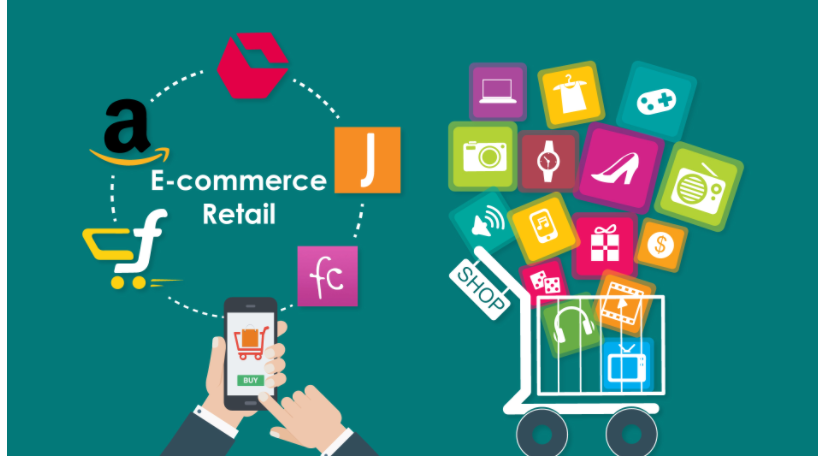

In [211]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [212]:
# import des libraires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Les données

In [213]:
#creation dataframe

df = pd.read_csv('data.csv',encoding = 'unicode_escape')

In [214]:
# visualisation notre dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


Nous pouvons voir que le fichier de données contient des informations pour chaque transaction. 

Regardez le numéro de facture et l'ID du client des premières entrées. 

Ici nous pouvons voir qu'un client avec l'ID 17850 du Royaume-Uni a fait une seule commande avec le numéro de facture 536365. 

Le client a commandé plusieurs produits avec différents codes de stock, descriptions, prix unitaires et quantités. De plus, nous pouvons voir que la date de facturation est la même pour tous ces produits.



In [215]:
# verification les nombres des colonnes et des lignes
df.shape

(541909, 8)

Notre dataframe a 8 variables et 541909 observation.

Colonnes:

**[InvoiceNo]**                  Unique ID pour identifier chaque facture - 6 chiffres. Avec C - cancel


**[StockCode]**                  Unique ID pour identifier chaque article en stock - 5 chiffres


**[Description]**                description de chaque article


**[Quantity]**                   nombres des articles achetée


**[InvoiceDate]**                date, mois, heure


**[UnitPrice]**                  le prix 


**[CustumerID]**                 client


**[Country]**                    le pays  où vit le client

## Nettoyage des données


In [216]:
# information pour notre dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Nous voyons que nous avons dans notre dataframe des valeurs manquntes.

In [217]:
# world map

world_map = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
world_map = world_map.reset_index(drop = False)
countries = world_map['Country'].value_counts()
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Plasma',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution=50,
                         showocean=True,
                         oceancolor="LightBlue",
                         showland=True,
                         landcolor="Gray",
                         showframe = True),
             template = 'plotly_white')

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

Nous pouvons voir que UK a le plus commandes. 

### Des valeurs manquantes

In [218]:
## verification des valeurs manquantes
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Nous observons que nous avons dans des colonnes CustomerID 135 080  des valeurs manquantes et dans la colonne Description 1454 des valeurs manquantes.

**Combien de % de valeurs manquantes avons-nous  ?**

In [219]:
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Près de 25 % des clients sont inconnus. En outre, nous avons 0,2 % de descriptions manquantes. Nous allons nous faire une idée plus précise en examinant quelques exemples.

In [220]:
## lignes avec NaN values
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/01/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/01/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/01/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/01/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/01/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/09/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/09/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/09/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/09/2011 10:26,10.79,NaN,United Kingdom


En cas de description manquante, il manque toujours le client et le prix unitaire.
Pourquoi le détaillant enregistre-t-il ce type d'entrées sans autre description ? 

Il semble qu'il n'existe pas de procédure sophistiquée pour traiter et enregistrer ce type de transactions. 
C'est déjà un indice que nous pouvons nous attendre à des entrées étranges dans nos données et qu'il peut être difficile de les détecter !


In [221]:
df.loc[df.CustomerID.isnull(), ["UnitPrice", "Quantity"]].describe()

,UnitPrice,Quantity
count,135080.000000,135080.000000
mean,8.076577,1.995573
std,151.900816,66.696153
min,-11062.060000,-9600.000000
25%,1.630000,1.000000
50%,3.290000,1.000000
75%,5.450000,3.000000
max,17836.460000,5568.000000


C'est également mauvais. Le prix et les quantités des entrées sans ID client peuvent présenter des valeurs aberrantes extrêmes. Comme nous pourrions vouloir créer ultérieurement des fonctionnalités basées sur des prix historiques et des quantités vendues, cela est très perturbant. 

Notre premier conseil au détaillant est de mettre en place des stratégies pour les transactions qui sont en quelque sorte défectueuses ou spéciales. 

Et la question demeure : Pourquoi est-il possible qu'une transaction soit dépourvue d'identifiant client ? Il est peut-être possible d'acheter en tant que quête mais il serait alors bon et propre de brancher un ID spécial qui indique que celui-ci est un invité.
Avons-nous des **nan** valeurs cachées dans les Descriptions ? Pour le savoir, créons une nouvelle fonctionnalité qui met les descriptions en minuscules.

**Descriptions manquantes cachées**

In [222]:
# lowercaase description

df.loc[df.Description.isnull()==False, "lowercase_descriptions"] = df.loc[
    df.Description.isnull()==False,"Description"
].apply(lambda l: l.lower())

df.lowercase_descriptions.dropna().apply(
    lambda l: np.where("nan" in l, True, False)
).value_counts()

False    539724
True        731
Name: lowercase_descriptions, dtype: int64

Pouvons nous trouver ""-strings?

In [223]:
df.lowercase_descriptions.dropna().apply(
    lambda l: np.where("" == l, True, False)
).value_counts()

False    540455
Name: lowercase_descriptions, dtype: int64

Nous avons trouvé d'autres nan valeurs cachées qui affichent une chaîne de caractères **"nan"** au lieu d'une nan valeur. Transformons-les en NaN :

In [224]:
df.loc[df.lowercase_descriptions.isnull()==False, "lowercase_descriptions"] = df.loc[
    df.lowercase_descriptions.isnull()==False, "lowercase_descriptions"
].apply(lambda l: np.where("nan" in l, None, l))

Comme nous ne savons pas pourquoi des clients ou des descriptions manquent et que nous avons vu des aberrations étranges dans les quantités et les prix ainsi que des prix nuls, jouons la sécurité et abandonnons toutes ces occurrences.

In [225]:
df =df.loc[(df.CustomerID.isnull()==False) & (df.lowercase_descriptions.isnull()==False)].copy()

In [226]:
# verification des valeurs manquantes

df.isnull().sum().sum()

0

In [227]:
## transfer InvoiceDate de object type en Datetime type
df['Invoice_date'] = pd.to_datetime(df.InvoiceDate)
df = df.drop(['InvoiceDate'],axis=1)

In [228]:
#The Time period 
#How long is the period in days?

df.Invoice_date.max() - df.Invoice_date.min()

Timedelta('373 days 04:24:00')

In [229]:
print("Datafile starts with timepoint {}".format(df.Invoice_date.min()))
print("Datafile ends with timepoint {}".format(df.Invoice_date.max()))

Datafile starts with timepoint 2010-12-01 08:26:00
Datafile ends with timepoint 2011-12-09 12:50:00


In [230]:
#How many different invoice numbers do we have?
df.InvoiceNo.nunique()

22186

In the data description we can find that a cancelled transactions starts with a "C" in front of it. Let's create a feature to easily filter out these cases:

In [231]:
df["IsCancelled"]=np.where(df.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
df.IsCancelled.value_counts() / df.shape[0] * 100

False    97.81007
True      2.18993
Name: IsCancelled, dtype: float64

2,2 % of all entries are cancellations.


In [232]:
df.loc[df.IsCancelled==True].describe()

,Quantity,UnitPrice,CustomerID
count,8896.000000,8896.000000,8896.000000
mean,-30.882981,18.862815,14991.575202
std,1170.746458,444.590459,1707.208018
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13506.000000
50%,-2.000000,2.950000,14895.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


Toutes les annulations ont des quantités négatives mais des prix unitaires positifs et non nuls.

Compte tenu de ces données, nous ne sommes pas en mesure de comprendre pourquoi un client a effectué un retour et il est très difficile de prévoir de tels cas, car il peut y avoir plusieurs raisons cachées pour lesquelles une annulation a été effectuée. 

In [233]:
# visulation dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,lowercase_descriptions,Invoice_date,IsCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,white hanging heart t-light holder,2010-12-01 08:26:00,False
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,white metal lantern,2010-12-01 08:26:00,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,2010-12-01 08:26:00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,2010-12-01 08:26:00,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,red woolly hottie white heart.,2010-12-01 08:26:00,False


**Stockcodes**

In [234]:
# verification unique values

df.StockCode.nunique()

3682

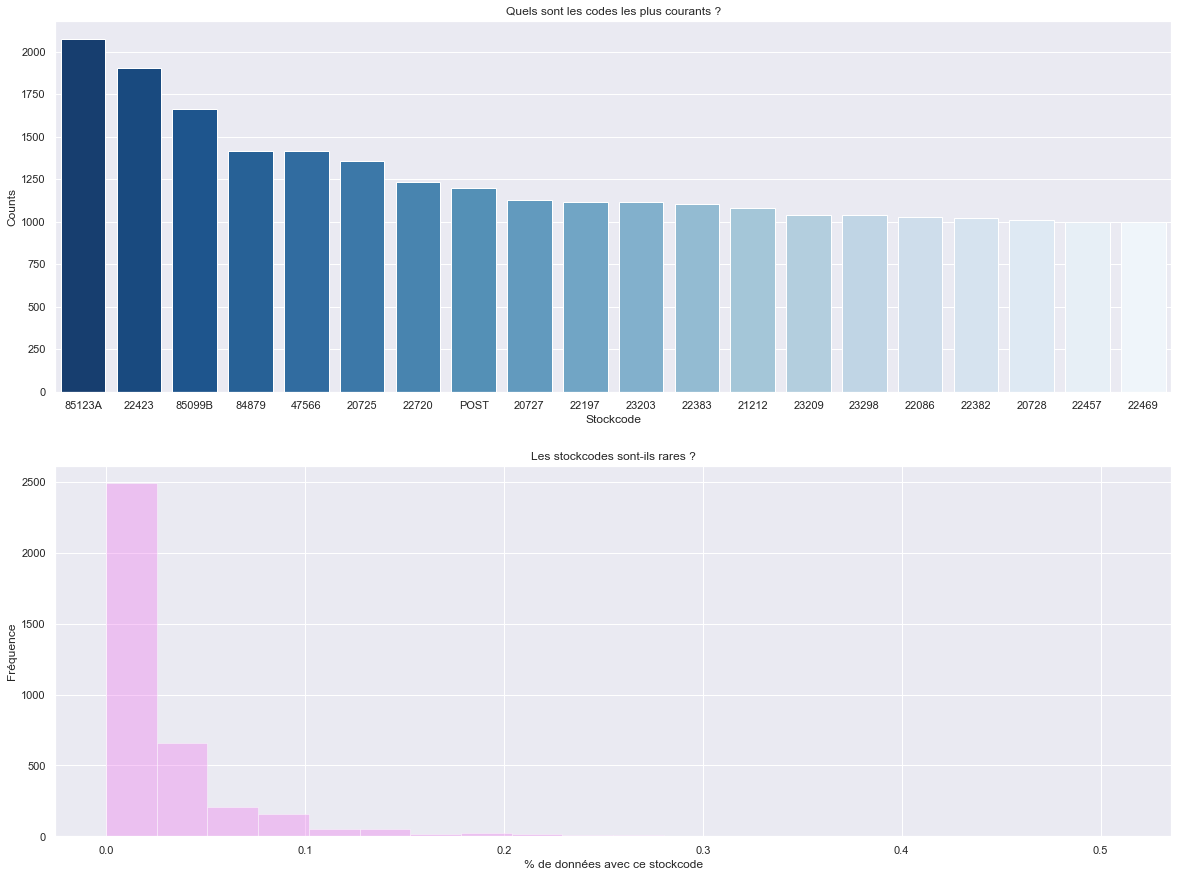

In [235]:
#Quels sont les codes les plus courants ?

stockcode_counts = df.StockCode.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_counts.iloc[0:20].index,
            stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="Blues_r")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Quels sont les codes les plus courants ?");
sns.distplot(np.round(stockcode_counts/df.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Violet")
ax[1].set_title("Les stockcodes sont-ils rares ?")
ax[1].set_xlabel("% de données avec ce stockcode")
ax[1].set_ylabel("Fréquence");
plt.savefig("P8_02_graphics/'Quels sont les codes les plus courants'.jpeg")
plt.show()


- Est-ce que le POST dans le code de stock le plus commun compte ?! C'est un cas étrange ! On peut donc s'attendre à des occurrences étranges non seulement dans les descriptions et les identifiants des clients mais aussi dans les codes de stock. Ce code est plus court que les autres et il n'est pas numérique.



- La plupart des codes de stock sont très rares. Cela indique que le détaillant vend de nombreux produits différents et qu'il n'y a pas de forte spécialisation d'un code de stock spécifique. Néanmoins, nous devons être prudents car cela ne doit pas signifier que le détaillant n'est pas spécialisé dans un type de produit spécifique. Le code de stock pourrait être un indicateur très détaillé qui ne fournit pas d'information sur le type de produit. Par exemple, les bouteilles d'eau peuvent avoir des variantes très différentes en termes de couleur, de nom et de forme, mais ce sont toutes des bouteilles d'eau.

In [236]:
# verification 
def count_numeric_chars(l):
    return sum(1 for c in l if c.isdigit())

df["StockCodeLength"] = df.StockCode.apply(lambda l: len(l))
df["nNumericStockCode"] = df.StockCode.apply(lambda l: count_numeric_chars(l))

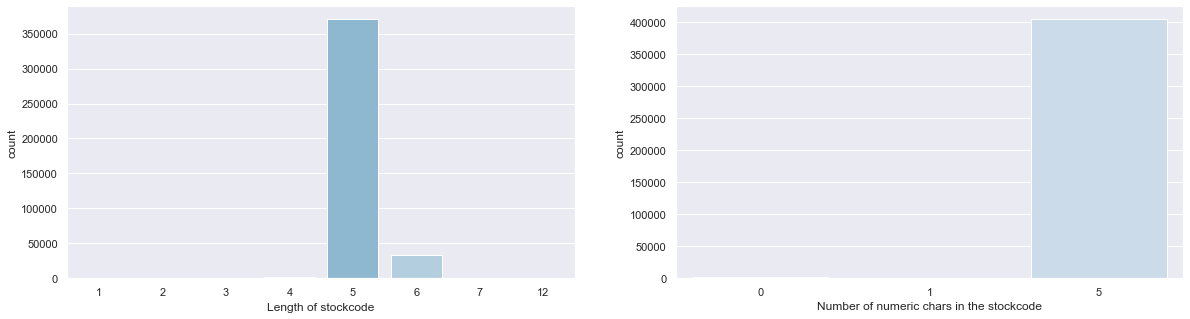

In [237]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(df["StockCodeLength"], palette="Blues_r", ax=ax[0])
sns.countplot(df["nNumericStockCode"], palette="Blues_r", ax=ax[1])
ax[0].set_xlabel("Length of stockcode")
ax[1].set_xlabel("Number of numeric chars in the stockcode");
plt.savefig("P8_02_graphics/'Stockcode'.jpeg")
plt.show()

Même si la majorité des échantillons ont un code de stock composé de 5 caractères numériques, nous pouvons voir qu’il existe également d’autres occurrences. La longueur peut varier entre 1 et 12 et il y a des codes de stock sans caractères numériques du tout!

In [238]:
df.loc[df.nNumericStockCode < 5].lowercase_descriptions.value_counts()

postage                       1196
manual                         465
carriage                       134
discount                        77
dotcom postage                  16
cruk commission                 16
bank charges                    12
pads to match all cushions       4
Name: lowercase_descriptions, dtype: int64

Encore une fois, cela indique que le détaillant ne fait pas bien la distinction entre les transactions de type spécial et les transactions client-détaillant valides. Laissons tomber toutes ces occurrences.

In [239]:
df = df.loc[(df.nNumericStockCode == 5) & (df.StockCodeLength==5)].copy()
df.StockCode.nunique()

2796

In [240]:
df = df.drop(["nNumericStockCode", "StockCodeLength"], axis=1)

**Descriptions**

In [241]:
#How many unique descriptions do we have?
df.Description.nunique()

2996

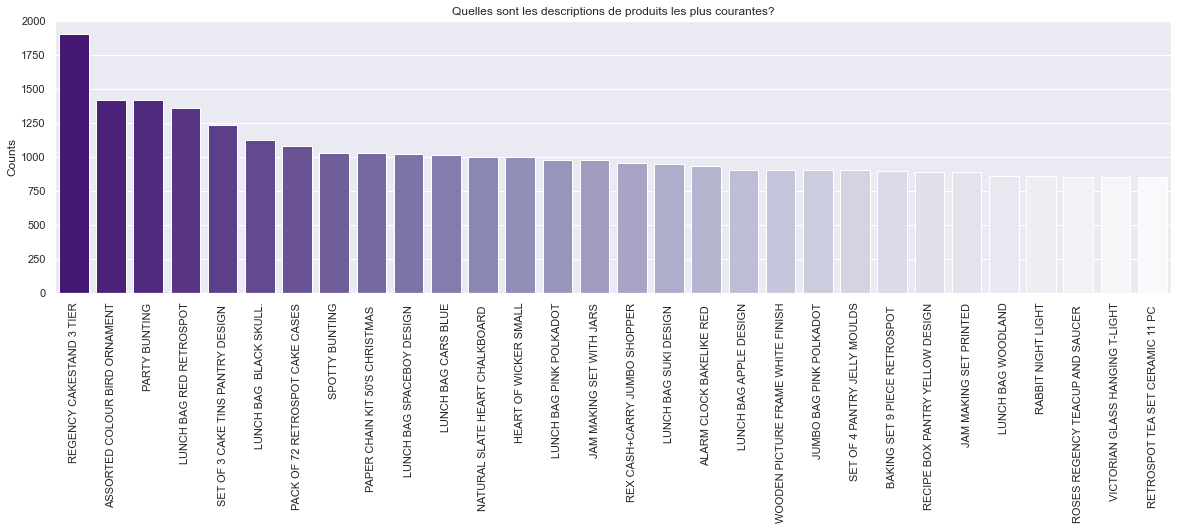

In [242]:
#And which are most common?
description_counts = df.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Quelles sont les descriptions de produits les plus courantes?");
plt.xticks(rotation=90);
plt.savefig("P8_02_graphics/'Description'.jpeg")
plt.show()

Nous pouvons voir que certaines descriptions correspondent à un type de produit similaire. Vous voyez les multiples occurrences de sacs de déjeuner ?
Nous disposons également souvent d'informations sur la couleur du produit. En outre, les descriptions les plus courantes semblent confirmer que le détaillant vend différents types de produits. 

Toutes les descriptions semblent être composées de caractères majuscules. Ok, maintenant faisons une analyse supplémentaire des descriptions en comptant la longueur et le nombre de caractères minuscules.

In [243]:
def count_lower_chars(l):
    return sum(1 for c in l if c.islower())

In [244]:
df["DescriptionLength"] = df.Description.apply(lambda l: len(l))
df["LowCharsInDescription"] = df.Description.apply(lambda l: count_lower_chars(l))

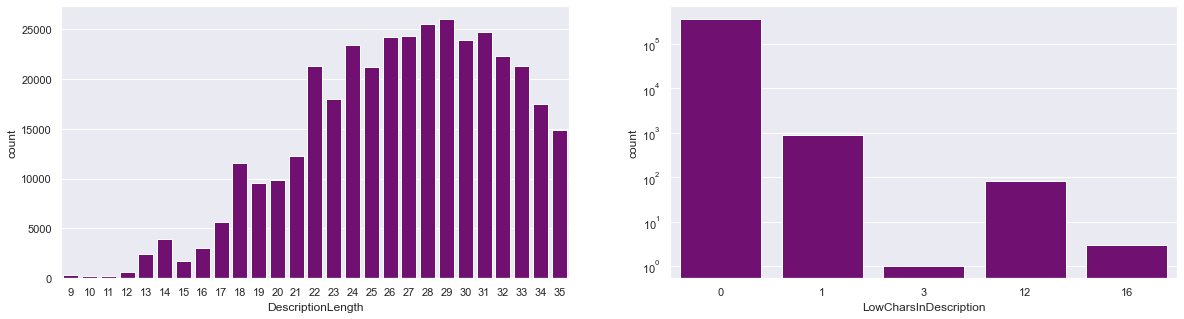

In [245]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(df.DescriptionLength, ax=ax[0], color="Purple")
sns.countplot(df.LowCharsInDescription, ax=ax[1], color="Purple")
ax[1].set_yscale("log")
plt.savefig("P8_02_graphics/'Description_countplot'.jpeg")
plt.show()

 Presque toutes les descriptions n’ont pas de caractères minuscules, mais nous avons trouvé des cas exceptionnels!



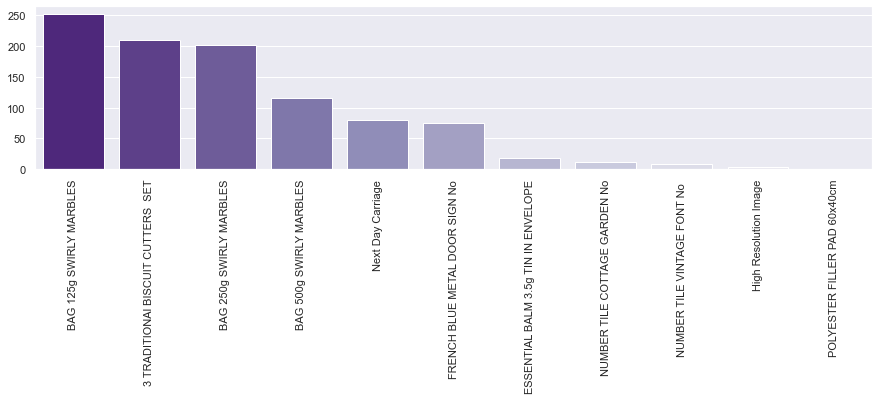

In [246]:
lowchar_counts = df.loc[df.LowCharsInDescription > 0].Description.value_counts()

plt.figure(figsize=(15,3))
sns.barplot(lowchar_counts.index, lowchar_counts.values, palette="Purples_r")
plt.xticks(rotation=90);
plt.savefig("P8_02_graphics/'Low_Description'.jpeg")
plt.show()


Le chariot du lendemain et l’image haute résolution sont étranges! Calculons la fraction de minuscule par rapport aux lettres majuscules :



In [247]:
def count_upper_chars(l):
    return sum(1 for c in l if c.isupper())

df["UpCharsInDescription"] = df.Description.apply(lambda l: count_upper_chars(l))

In [248]:
df.UpCharsInDescription.describe()

count    370414.000000
mean         22.577878
std           4.352726
min           3.000000
25%          20.000000
50%          23.000000
75%          26.000000
max          32.000000
Name: UpCharsInDescription, dtype: float64

In [249]:
df.loc[df.UpCharsInDescription <=5].Description.value_counts()

Next Day Carriage        80
High Resolution Image     3
Name: Description, dtype: int64

C’est étrange qu’ils diffèrent des autres. Laissons-les tomber:



In [250]:
df = df.loc[df.UpCharsInDescription > 5].copy()

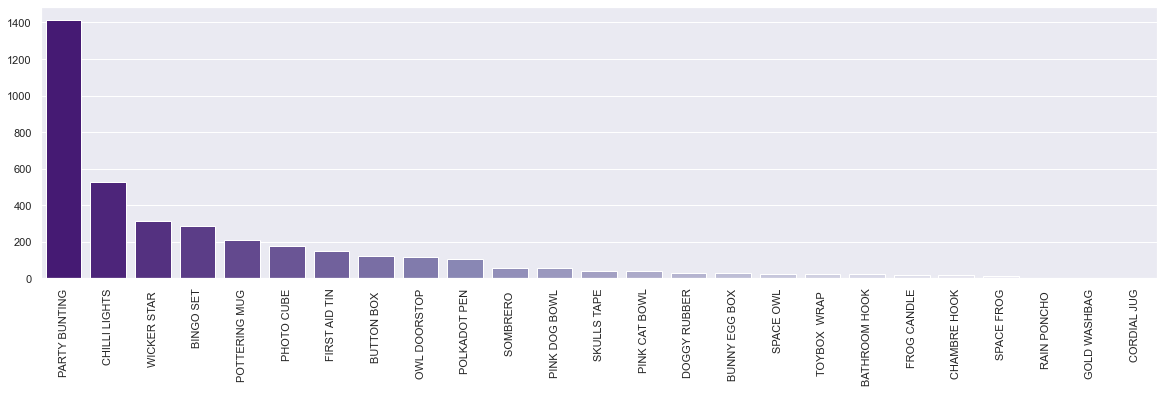

In [251]:
dlength_counts = df.loc[df.DescriptionLength < 14].Description.value_counts()

plt.figure(figsize=(20,5))
sns.barplot(dlength_counts.index, dlength_counts.values, palette="Purples_r")
plt.xticks(rotation=90);
plt.savefig("P8_02_graphics/'Description'.jpeg")
plt.show()

Les descriptions de petite longueur semblent valides et nous ne devrions pas les laisser tomber. Ok, voyons maintenant combien de codes de stock uniques avons-nous et combien de descriptions uniques?



In [252]:
df.StockCode.nunique()

2794

In [253]:
df.Description.nunique()

2994

Nous avons toujours plus de descriptions que de codes de stock et nous devons continuer à chercher pourquoi ils diffèrent.

In [254]:
df.groupby("StockCode").Description.nunique().sort_values(ascending=False).iloc[0:10]

StockCode
23236    4
23196    4
22776    3
23126    3
23131    3
23231    3
23209    3
23396    3
22937    3
23240    3
Name: Description, dtype: int64

Nous avons encore des codes de stock avec des descriptions multiples. Prenons un exemple :

In [255]:
df.loc[df.StockCode == "23244"].Description.value_counts()

ROUND STORAGE TIN VINTAGE LEAF    101
STORAGE TIN VINTAGE LEAF            7
CANNISTER VINTAGE LEAF DESIGN       2
Name: Description, dtype: int64

En parcourant les cas, nous pouvons voir que les codes de stock sont parfois nommés un peu différemment en raison de mots manquants ou modifiés ou de fautes de frappe. Néanmoins, ils semblent corrects et nous pouvons continuer.

**Customers**

In [256]:
df.CustomerID.nunique()

4342

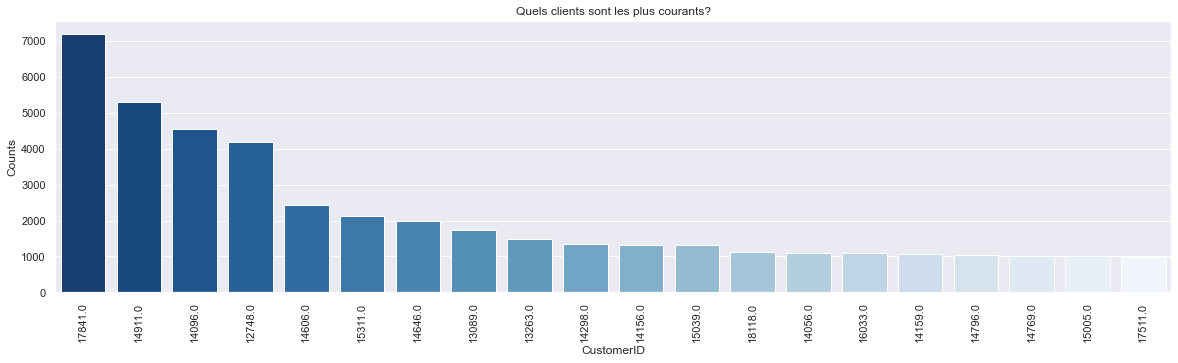

In [257]:
customer_counts = df.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index, palette="Blues_r")
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Quels clients sont les plus courants?");
plt.xticks(rotation=90);
plt.savefig("P8_02_graphics/'CustomerID'.jpeg")
plt.show()

In [258]:
customer_quantity =  pd.DataFrame(df.groupby(['CustomerID'])['Quantity'].sum())
customer_quantity .reset_index(inplace=True)


In [259]:
customer_quantity .sort_values(by="Quantity", ascending=False)

,CustomerID,Quantity
1696,14646.0,189822
55,12415.0,75380
1887,14911.0,71368
3737,17450.0,64847
4206,18102.0,62811
...,...,...
3630,17307.0,-144
3229,16742.0,-190
1377,14213.0,-244
2565,15823.0,-272


**Countries**

Combien de pays uniques sont livrés par le détaillant ?

In [260]:
df.Country.nunique()

37

Et lesquelles sont les plus courantes ?

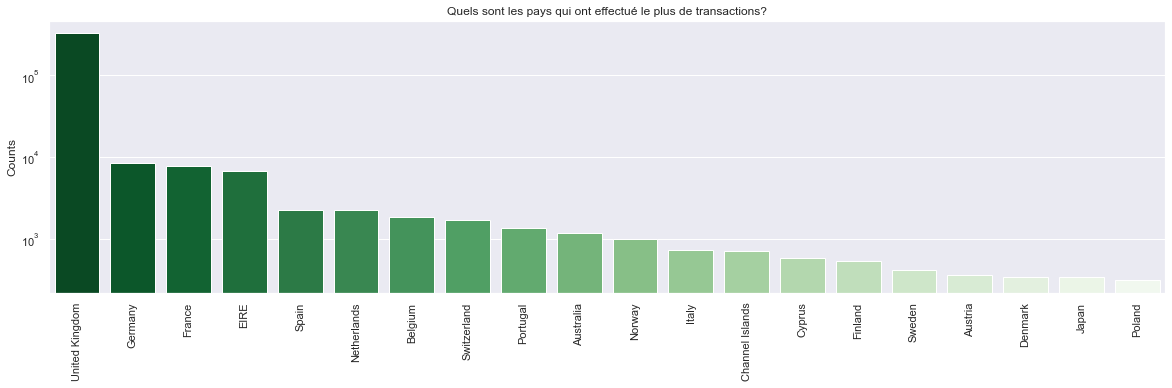

In [261]:
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Quels sont les pays qui ont effectué le plus de transactions?");
plt.xticks(rotation=90);
plt.yscale("log")
plt.savefig("P8_02_graphics/'Country'.jpeg")
plt.show()

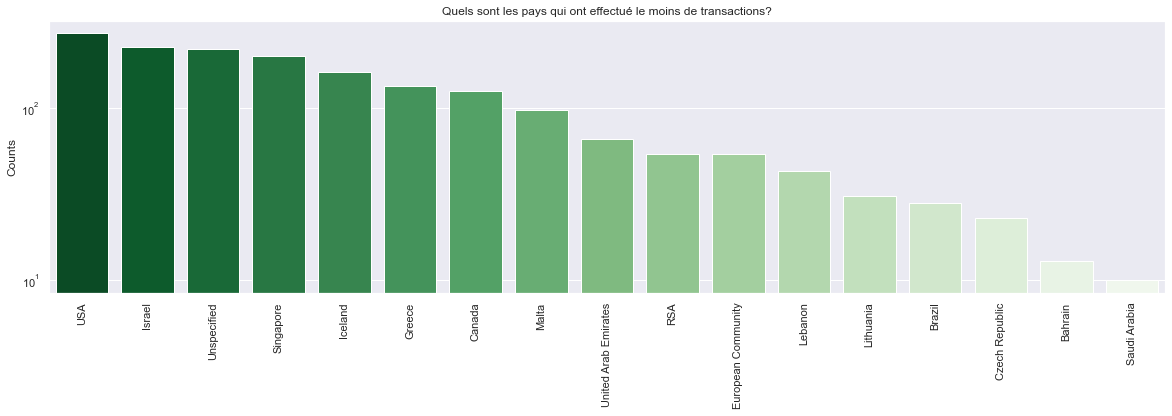

In [262]:
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[20:37]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Quels sont les pays qui ont effectué le moins de transactions?");
plt.xticks(rotation=90);
plt.yscale("log")
plt.savefig("P8_02_graphics/'Country1'.jpeg")
plt.show()

Nous pouvons constater que le détaillant vend presque tous ses produits au Royaume-Uni, suivi par de nombreux pays européens. Quel est le pourcentage d'entrées au Royaume-Uni ?

In [263]:
df.loc[df.Country=="United Kingdom"].shape[0] / df.shape[0] * 100


89.01226200345097

Créons une fonction pour indiquer l'intérieur ou l'extérieur du Royaume-Uni :

In [264]:
df["UK"] = np.where(df.Country == "United Kingdom", 1, 0)

**Unit Price**

In [265]:
df.UnitPrice.describe()

count    370331.000000
mean          2.920642
std           4.537140
min           0.000000
25%           1.250000
50%           1.850000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

Encore une fois, nous avons des occurrences étranges : des prix unitaires nuls !

In [266]:
df.loc[df.UnitPrice == 0].sort_values(by="Quantity", ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,lowercase_descriptions,Invoice_date,IsCancelled,DescriptionLength,LowCharsInDescription,UpCharsInDescription,UK
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,0.0,13256.0,United Kingdom,asstd design 3d paper stickers,2011-11-25 15:57:00,False,30,0,25,1
298054,562973,23157,SET OF 6 NATIVITY MAGNETS,240,0.0,14911.0,EIRE,set of 6 nativity magnets,2011-08-11 11:42:00,False,26,0,20,0
436428,574138,23234,BISCUIT TIN VINTAGE CHRISTMAS,216,0.0,12415.0,Australia,biscuit tin vintage christmas,2011-11-03 11:26:00,False,29,0,26,0
314746,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,0.0,14646.0,Netherlands,set of 2 ceramic christmas reindeer,2011-08-26 14:19:00,False,35,0,29,0
314748,564651,21786,POLKADOT RAIN HAT,144,0.0,14646.0,Netherlands,polkadot rain hat,2011-08-26 14:19:00,False,18,0,15,0


Ce n'est pas encore bon. Il n'est pas évident de savoir si ce sont des cadeaux aux clients ou non.On va les suprimer.

In [267]:
# UnitPrice superiour de 0
data_unit_price = df.loc[df.UnitPrice > 0].copy()

In [268]:
# verification des valeurs manquantes
df["UnitPrice"].isnull().sum()

0

In [269]:
np.exp(-2)

0.1353352832366127

In [270]:
np.exp(3)

20.085536923187668

In [271]:
np.quantile(df.UnitPrice, 0.95)

8.5

In [272]:
df = df.loc[(df.UnitPrice > 0.1) & (df.UnitPrice < 20)].copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,lowercase_descriptions,Invoice_date,IsCancelled,DescriptionLength,LowCharsInDescription,UpCharsInDescription,UK
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,white metal lantern,2010-12-01 08:26:00,False,19,0,17,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,set 7 babushka nesting boxes,2010-12-01 08:26:00,False,28,0,23,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,glass star frosted t-light holder,2010-12-01 08:26:00,False,33,0,28,1
7,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,hand warmer union jack,2010-12-01 08:28:00,False,22,0,19,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,hand warmer red polka dot,2010-12-01 08:28:00,False,25,0,21,1


**Quantities**

In [273]:
## check positive and negative quantities(returns)
data_buy = df[df["Quantity"] >= 0]
data_return = df[df["Quantity"] < 0]

In [274]:
# article qui ont été acheté
data_buy["Quantity"].count()

361608

In [275]:
# les article retournée

data_return["Quantity"].count()

7819

In [276]:
# precentage les articles retournés
print(round((data_return["Quantity"].count()) / len(df) * 100, 1), '% du dataset')

2.1 % du dataset


In [277]:
df.drop(df.index[df['Quantity'] < 0], inplace=True)


In [278]:
df.Quantity.describe()

count    361608.000000
mean         13.024112
std         187.566510
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

D'accord, la plupart des produits sont vendus en quantités de 1 à 12. Mais, nous avons à nouveau des valeurs extrêmes et irréalistes.

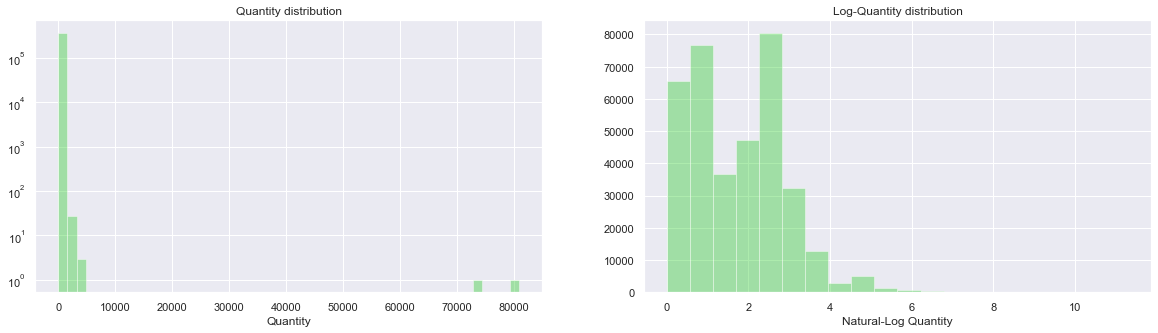

In [279]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.Quantity, ax=ax[0], kde=False, color="limegreen");
sns.distplot(np.log(df.Quantity), ax=ax[1], bins=20, kde=False, color="limegreen");
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")
ax[1].set_xlabel("Natural-Log Quantity");
plt.savefig("P8_02_graphics/Quantity distribution.jpeg")
plt.show()

In [280]:
np.exp(4)

54.598150033144236

In [281]:
np.quantile(df.Quantity, 0.95)

36.0

Dans ce cas, nous couvririons encore plus de 95 % des données !

In [282]:
## copy
df_clean = df.copy()

In [283]:
# visulation dataframe
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,lowercase_descriptions,Invoice_date,IsCancelled,DescriptionLength,LowCharsInDescription,UpCharsInDescription,UK
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,white metal lantern,2010-12-01 08:26:00,False,19,0,17,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,set 7 babushka nesting boxes,2010-12-01 08:26:00,False,28,0,23,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,glass star frosted t-light holder,2010-12-01 08:26:00,False,33,0,28,1
7,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,hand warmer union jack,2010-12-01 08:28:00,False,22,0,19,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,hand warmer red polka dot,2010-12-01 08:28:00,False,25,0,21,1


In [284]:
## check missing values for each column of df_clean
df_clean.isnull().sum().sort_values(ascending=False)

InvoiceNo                 0
StockCode                 0
Description               0
Quantity                  0
UnitPrice                 0
CustomerID                0
Country                   0
lowercase_descriptions    0
Invoice_date              0
IsCancelled               0
DescriptionLength         0
LowCharsInDescription     0
UpCharsInDescription      0
UK                        0
dtype: int64

In [285]:
## convert customer_id column from float to int
df_clean['customer_id']=df_clean.CustomerID.astype('int64')
df_clean = df_clean.drop(['CustomerID'],axis=1)

In [286]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361608 entries, 1 to 541908
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   InvoiceNo               361608 non-null  object        
 1   StockCode               361608 non-null  object        
 2   Description             361608 non-null  object        
 3   Quantity                361608 non-null  int64         
 4   UnitPrice               361608 non-null  float64       
 5   Country                 361608 non-null  object        
 6   lowercase_descriptions  361608 non-null  object        
 7   Invoice_date            361608 non-null  datetime64[ns]
 8   IsCancelled             361608 non-null  bool          
 9   DescriptionLength       361608 non-null  int64         
 10  LowCharsInDescription   361608 non-null  int64         
 11  UpCharsInDescription    361608 non-null  int64         
 12  UK                      361608

In [287]:
## statistical summary of quantitave variables
df_clean.describe()

,Quantity,UnitPrice,DescriptionLength,LowCharsInDescription,UpCharsInDescription,UK,customer_id
count,361608.000000,361608.000000,361608.000000,361608.000000,361608.000000,361608.000000,361608.000000
mean,13.024112,2.797913,26.647693,0.002417,22.573179,0.891053,15295.805527
std,187.566510,2.740866,5.238373,0.049272,4.347976,0.311573,1712.088464
min,1.000000,0.120000,9.000000,0.000000,8.000000,0.000000,12346.000000
25%,2.000000,1.250000,23.000000,0.000000,20.000000,1.000000,13969.000000
50%,6.000000,1.740000,27.000000,0.000000,23.000000,1.000000,15159.000000
75%,12.000000,3.750000,31.000000,0.000000,26.000000,1.000000,16794.000000
max,80995.000000,19.960000,35.000000,3.000000,32.000000,1.000000,18287.000000


## Feature engineering

In [288]:
## verification combine des pays nous avons dans notre dataframe

countries = df_clean['Country'].unique()
print(countries)
print(len(countries))

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Finland' 'Austria' 'Sweden' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
37


Nous pouvons voir que dans la list de pays nous avons et pays "Unspecified".

In [289]:
df_clean.drop(df_clean.loc[df_clean['Country']=='Unspecified'].index, inplace=True)

### Total price

In [290]:
# calculation total price 

df_clean["Total_price"]=df_clean["Quantity"]*df_clean["UnitPrice"]

In [291]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,lowercase_descriptions,Invoice_date,IsCancelled,DescriptionLength,LowCharsInDescription,UpCharsInDescription,UK,customer_id,Total_price
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,white metal lantern,2010-12-01 08:26:00,False,19,0,17,1,17850,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom,set 7 babushka nesting boxes,2010-12-01 08:26:00,False,28,0,23,1,17850,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom,glass star frosted t-light holder,2010-12-01 08:26:00,False,33,0,28,1,17850,25.50
7,536366,22633,HAND WARMER UNION JACK,6,1.85,United Kingdom,hand warmer union jack,2010-12-01 08:28:00,False,22,0,19,1,17850,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,United Kingdom,hand warmer red polka dot,2010-12-01 08:28:00,False,25,0,21,1,17850,11.10


In [292]:
df_clean.to_csv("df_clean.csv")

# Analyse de données et visualisations

In [293]:
# chifre des affaires

print(round(df_clean['Total_price'].sum()), 'Chiffres des affaires')

7905135 Chiffres des affaires


In [294]:
chiffre = pd.DataFrame(df_clean.groupby(['Country'])['Total_price'].sum())
chiffre.sort_values(by='Total_price', ascending=False).round()

,Total_price
Country,
United Kingdom,6522609.0
Netherlands,268361.0
EIRE,241777.0
Germany,189481.0
France,173241.0
Australia,134001.0
Switzerland,48045.0
Spain,42467.0
Japan,35558.0


In [295]:
chiffre.reset_index(inplace=True)

In [296]:
chiffre.value_counts()

Country               Total_price 
Australia             1.340010e+05    1
Austria               7.642730e+03    1
Lebanon               1.663580e+03    1
Lithuania             1.439060e+03    1
Malta                 1.767850e+03    1
Netherlands           2.683606e+05    1
Norway                2.852930e+04    1
Poland                6.442810e+03    1
Portugal              2.504253e+04    1
RSA                   9.495600e+02    1
Saudi Arabia          1.459200e+02    1
Singapore             8.402570e+03    1
Spain                 4.246659e+04    1
Sweden                3.512805e+04    1
Switzerland           4.804473e+04    1
USA                   3.313890e+03    1
United Arab Emirates  1.799380e+03    1
Japan                 3.555757e+04    1
Italy                 1.468742e+04    1
Israel                6.523880e+03    1
Czech Republic        6.645800e+02    1
Bahrain               4.521000e+02    1
Belgium               3.456108e+04    1
Brazil                1.069650e+03    1
Canad

In [297]:
chiffre['% par pays'] = chiffre['Total_price']/df_clean['Total_price'].sum()*100
chiffre.sort_values(by="% par pays", ascending=False)

,Country,Total_price,% par pays
35,United Kingdom,6.522609e+06,82.511040
23,Netherlands,2.683606e+05,3.394763
10,EIRE,2.417766e+05,3.058475
14,Germany,1.894806e+05,2.396931
13,France,1.732409e+05,2.191499
0,Australia,1.340010e+05,1.695114
32,Switzerland,4.804473e+04,0.607766
30,Spain,4.246659e+04,0.537203
19,Japan,3.555757e+04,0.449803
31,Sweden,3.512805e+04,0.444370


In [298]:
chiffre.sort_values(by="Total_price", ascending=False)

,Country,Total_price,% par pays
35,United Kingdom,6.522609e+06,82.511040
23,Netherlands,2.683606e+05,3.394763
10,EIRE,2.417766e+05,3.058475
14,Germany,1.894806e+05,2.396931
13,France,1.732409e+05,2.191499
0,Australia,1.340010e+05,1.695114
32,Switzerland,4.804473e+04,0.607766
30,Spain,4.246659e+04,0.537203
19,Japan,3.555757e+04,0.449803
31,Sweden,3.512805e+04,0.444370


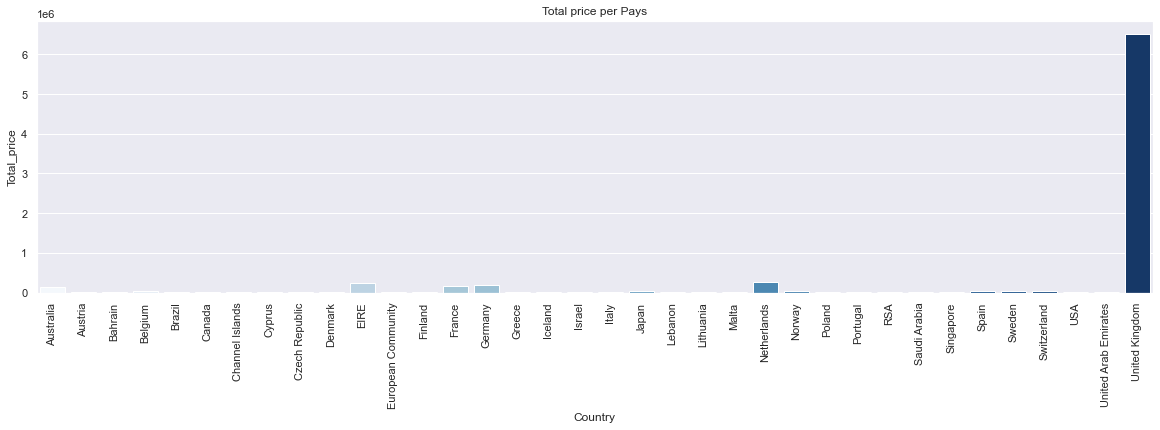

In [299]:

plt.figure(figsize=(20,5))
sns.barplot(x="Country",y="Total_price",data=chiffre, palette="Blues")
plt.title("Total price per Pays")
plt.xticks(rotation=90)
plt.savefig("P8_02_graphics/'Total_price'.jpeg")
plt.show()

In [300]:
#  avec describe on voit 
# le premier place REGENCY CAKESTAND 3 
# la fréquence de la valeur la plus courante

df_clean['Description'].describe()

count                       361388
unique                        2956
top       REGENCY CAKESTAND 3 TIER
freq                          1711
Name: Description, dtype: object

En premier place de la produit c'est REGENCY CAKESTAND 3 .
Nous avons dans notre dataset 2955 produits/articles.

In [301]:
# frequence des prix 
# le prix 15.00 est plus frequente

df_clean['Total_price'].value_counts()

15.00     18694
16.50      8451
17.70      7970
10.20      7498
19.80      7304
          ...  
70.56         1
33.30         1
245.76        1
462.58        1
32.60         1
Name: Total_price, Length: 2661, dtype: int64

In [302]:
# Avec value_counts pour colonne Total_price  on vois que produis qui ont prix 15.00  il sont plus nomberuse 5.046692%
df_clean['Total_price'].value_counts(normalize=True)*100

15.00     5.172834
16.50     2.338484
17.70     2.205386
10.20     2.074778
19.80     2.021096
            ...   
70.56     0.000277
33.30     0.000277
245.76    0.000277
462.58    0.000277
32.60     0.000277
Name: Total_price, Length: 2661, dtype: float64

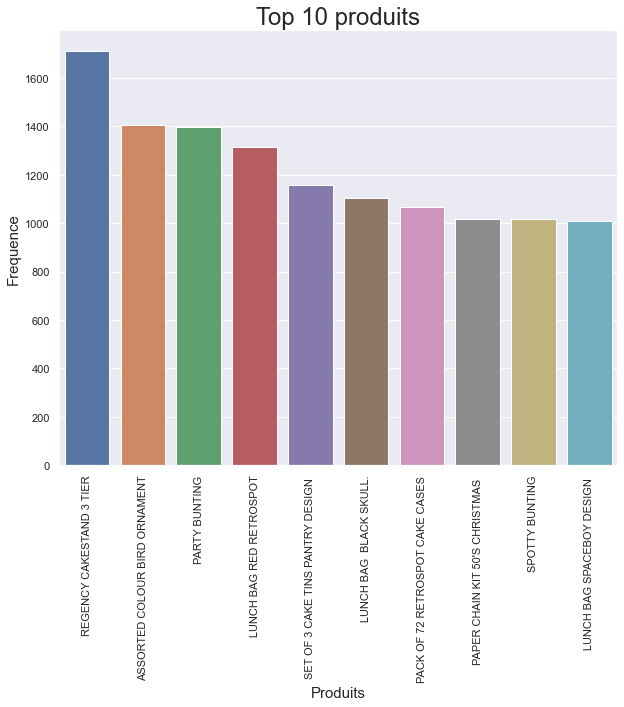

In [303]:
 # Categorie de livre a été la plus choisie
sns.set(rc={"figure.figsize":(10, 8)})

products = df_clean['Description'].value_counts().head(10)
ax=sns.barplot(x=products.index, y=products.values).set_title('Top 10 produits',fontdict= { 'fontsize': 24});

plt.xlabel("Produits",fontdict= { 'fontsize': 15})
plt.ylabel("Frequence",fontdict= { 'fontsize': 15})
plt.xticks(rotation=90)
plt.savefig("P8_02_graphics/'Produits'.jpeg")
plt.show()

In [304]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361388 entries, 1 to 541908
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   InvoiceNo               361388 non-null  object        
 1   StockCode               361388 non-null  object        
 2   Description             361388 non-null  object        
 3   Quantity                361388 non-null  int64         
 4   UnitPrice               361388 non-null  float64       
 5   Country                 361388 non-null  object        
 6   lowercase_descriptions  361388 non-null  object        
 7   Invoice_date            361388 non-null  datetime64[ns]
 8   IsCancelled             361388 non-null  bool          
 9   DescriptionLength       361388 non-null  int64         
 10  LowCharsInDescription   361388 non-null  int64         
 11  UpCharsInDescription    361388 non-null  int64         
 12  UK                      361388

In [305]:
# frequence des facture
# facture 576339 est 542 fois 
df_clean['InvoiceNo'].value_counts()

576339    484
579196    479
580727    466
578270    400
573576    382
         ... 
576902      1
552056      1
576084      1
561002      1
570489      1
Name: InvoiceNo, Length: 18171, dtype: int64

In [306]:
## rearrange columns of data
#df_clean = df_clean[['InvoiceNo','Invoice_date','StockCode','Description','Quantity','UnitPrice','Total_price','customer_id'
                    #,'Country']]

In [307]:
#df_clean.head()

### Add columns of invoice month, day and hour 

In [308]:
df_clean["Year"] = df_clean.Invoice_date.dt.year
df_clean["Quarter"] = df_clean.Invoice_date.dt.quarter
df_clean["Month"] = df_clean.Invoice_date.dt.month
df_clean["Month_name"] = df_clean.Invoice_date.dt.month_name()
df_clean["Week"] = df_clean.Invoice_date.dt.week
df_clean["Weekday"] = df_clean.Invoice_date.dt.weekday
df_clean["Day"] = df_clean.Invoice_date.dt.day
df_clean["Day_name"] = df_clean.Invoice_date.dt.day_name()
df_clean["Dayofyear"] = df_clean.Invoice_date.dt.dayofyear

df_clean["Date"] = pd.to_datetime(df_clean[['Year', 'Month', 'Day']])
df_clean['Daymonth']=df_clean['Day'].astype(str)+'/'+df_clean['Month'].astype(str)
df_clean['Daymonthyear']=df_clean['Daymonth'].astype(str)+'/'+df_clean['Year'].astype(str)
df_clean['Monthyear']=df_clean['Month'].astype(str)+'/'+df_clean['Year'].astype(str)

df_clean['Hour']=df_clean.Invoice_date.dt.hour
df_clean['Minute']=df_clean.Invoice_date.dt.minute
df_clean['Second']=df_clean.Invoice_date.dt.second


In [309]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361388 entries, 1 to 541908
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   InvoiceNo               361388 non-null  object        
 1   StockCode               361388 non-null  object        
 2   Description             361388 non-null  object        
 3   Quantity                361388 non-null  int64         
 4   UnitPrice               361388 non-null  float64       
 5   Country                 361388 non-null  object        
 6   lowercase_descriptions  361388 non-null  object        
 7   Invoice_date            361388 non-null  datetime64[ns]
 8   IsCancelled             361388 non-null  bool          
 9   DescriptionLength       361388 non-null  int64         
 10  LowCharsInDescription   361388 non-null  int64         
 11  UpCharsInDescription    361388 non-null  int64         
 12  UK                      361388

In [310]:
#chiffre des affaires par an
nb_vente_mois =pd.DataFrame(df_clean.groupby(['Monthyear'])['Total_price'].sum())
nb_vente_mois

,Total_price
Monthyear,
1/2011,492572.06
10/2011,931186.34
11/2011,1048930.02
12/2010,494835.62
12/2011,492581.35
2/2011,392457.32
3/2011,519300.60
4/2011,400914.98
5/2011,594578.98


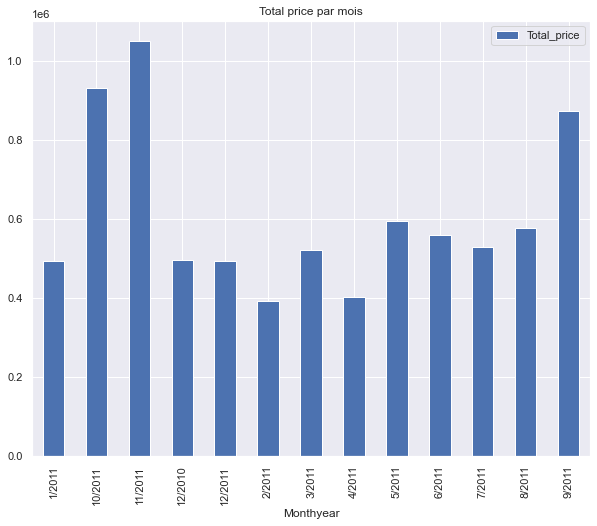

In [311]:
nb_vente_mois.plot(kind="bar")
plt.title("Total price par mois")
plt.xticks(rotation=90)
plt.savefig("P8_02_graphics/'Total_price par mois'.jpeg")
plt.show()

In [312]:
nb_commonde = pd.DataFrame(df_clean.groupby(['Monthyear'])['InvoiceNo'].count())
nb_commonde

,InvoiceNo
Monthyear,
1/2011,18885
10/2011,45689
11/2011,59637
12/2010,23025
12/2011,16040
2/2011,17812
3/2011,24236
4/2011,20226
5/2011,25724


**Calcul du Panier moyen**


Comment calculer le panier moyen ? En divisant votre chiffre d’affaires total par le nombre de commandes. Vous pouvez faire le calcul du panier moyen par jour, par mois ou par an.

Voici la formule du panier moyen : chiffre d’affaires/nombre de commandes

In [313]:
panier_moy = nb_vente_mois.merge(nb_commonde, left_on='Monthyear',right_on='Monthyear' )
panier_moy["panier_moyen"] = (panier_moy['Total_price']/panier_moy['InvoiceNo']).round()
panier_moy

,Total_price,InvoiceNo,panier_moyen
Monthyear,,,
1/2011,492572.06,18885,26.0
10/2011,931186.34,45689,20.0
11/2011,1048930.02,59637,18.0
12/2010,494835.62,23025,21.0
12/2011,492581.35,16040,31.0
2/2011,392457.32,17812,22.0
3/2011,519300.60,24236,21.0
4/2011,400914.98,20226,20.0
5/2011,594578.98,25724,23.0


In [314]:
panier_moy.reset_index(inplace=True)
panier_moy

,Monthyear,Total_price,InvoiceNo,panier_moyen
0,1/2011,492572.06,18885,26.0
1,10/2011,931186.34,45689,20.0
2,11/2011,1048930.02,59637,18.0
3,12/2010,494835.62,23025,21.0
4,12/2011,492581.35,16040,31.0
5,2/2011,392457.32,17812,22.0
6,3/2011,519300.60,24236,21.0
7,4/2011,400914.98,20226,20.0
8,5/2011,594578.98,25724,23.0
9,6/2011,559168.69,24659,23.0


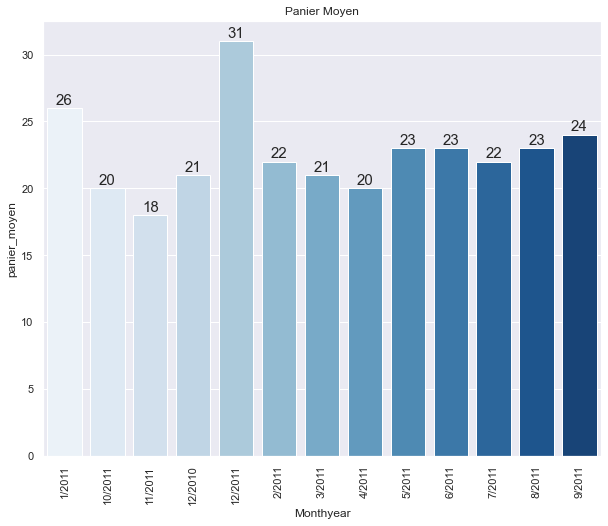

In [315]:
ax = sns.barplot(x="Monthyear", y="panier_moyen",data=panier_moy, palette="Blues", ci=None)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Panier Moyen")
plt.xticks(rotation=90)
plt.savefig("P8_02_graphics/'Panier Moyen'.jpeg")
plt.show() 


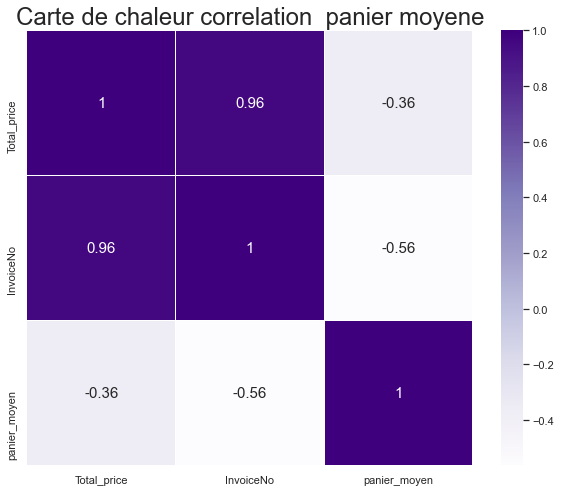

In [316]:
sns.heatmap(panier_moy.corr(), annot=True, cmap="Purples",linewidths =.5,annot_kws = {'size':15})

plt.title("Carte de chaleur correlation  panier moyene", size=24)

plt.savefig("P8_02_graphics/'Carte de chaleur correlation  panier moyene'.jpeg")
plt.show() 


In [317]:
#chiffre des affaires par an
nb_vente_an =pd.DataFrame(df_clean.groupby(['Month_name'])['Total_price'].sum())
nb_vente_an



,Total_price
Month_name,
April,400914.98
August,577385.95
December,987416.97
February,392457.32
January,492572.06
July,527513.85
June,559168.69
March,519300.60
May,594578.98


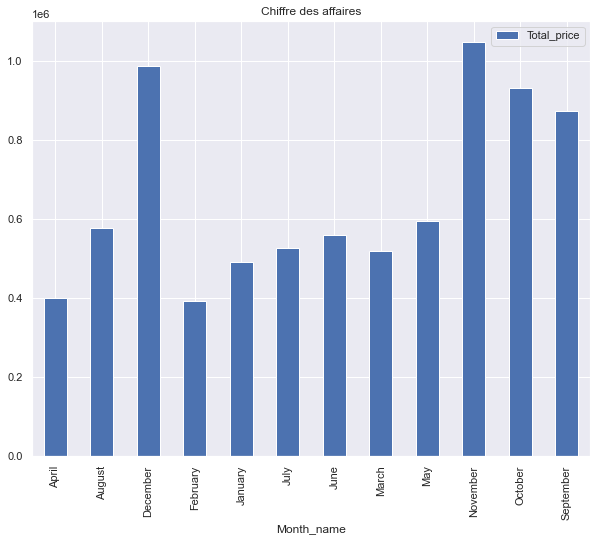

In [318]:
nb_vente_an.plot(kind="bar")
plt.title("Chiffre des affaires")
plt.xticks(rotation=90)
plt.savefig("P8_02_graphics/'Chiffre des affaires'.jpeg")
plt.show() 

In [319]:
#chiffre des affaires par jour
nb_vente_jour =pd.DataFrame(df_clean.groupby(['Day'])['Total_price'].sum())
nb_vente_jour

,Total_price
Day,
1,250904.39
2,228605.01
3,248255.04
4,287874.71
5,312540.96
6,301472.63
7,336982.43
8,266421.21
9,430012.52


<Figure size 1440x864 with 0 Axes>

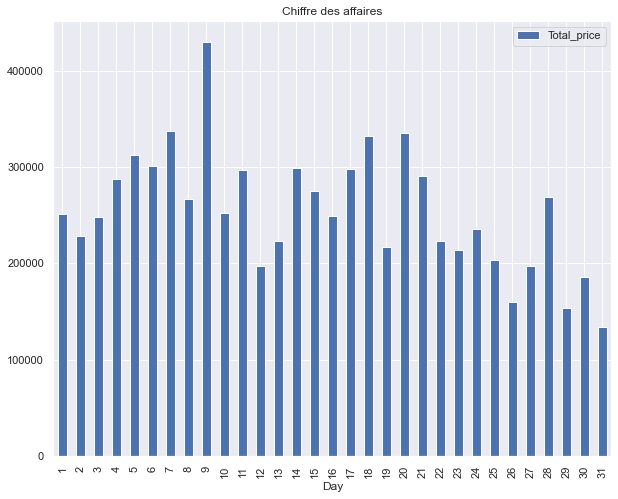

In [320]:
plt.figure(figsize=(20,12))
nb_vente_jour.plot(kind="bar")
plt.title("Chiffre des affaires")
plt.xticks(rotation=90)
plt.savefig("P8_02_graphics/'Chiffre des affaires par jour'.jpeg")
plt.show() 


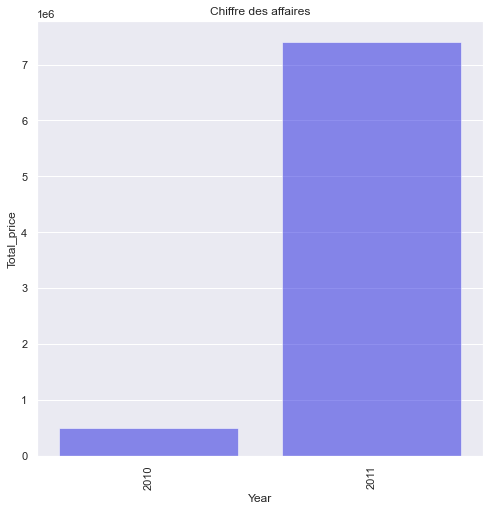

In [321]:
year_sale = df_clean.groupby(['Year']).sum()['Total_price'].reset_index()#.sort_values(by= 'Total_price', ascending = False)

plt.figure(figsize=(8,8))
sns.barplot(x = 'Year',y ='Total_price',data=year_sale, color = 'blue', alpha = .5);

plt.title("Chiffre des affaires")
plt.xticks(rotation=90)
plt.savefig("P8_02_graphics/'Chiffre des affaires'.jpeg")
plt.show() 


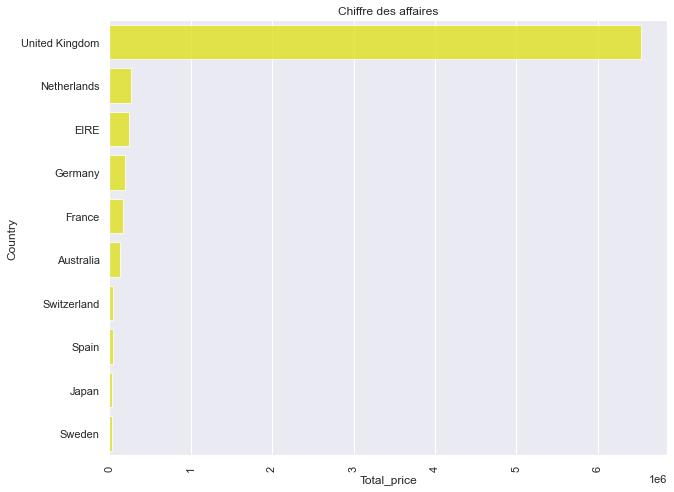

In [322]:
country_df = df_clean.groupby(['Country']).sum()['Total_price'].reset_index().sort_values(by = 'Total_price', ascending = False)
sns.barplot(x = 'Total_price',y ='Country',data=country_df.head(10), color = 'yellow', alpha = .8);

plt.title("Chiffre des affaires")
plt.xticks(rotation=90)
plt.savefig("P8_02_graphics/'Chiffre des affaires Pays'.jpeg")
plt.show() 


In [323]:
uk_df = df_clean[df_clean['Country'] == 'United Kingdom']

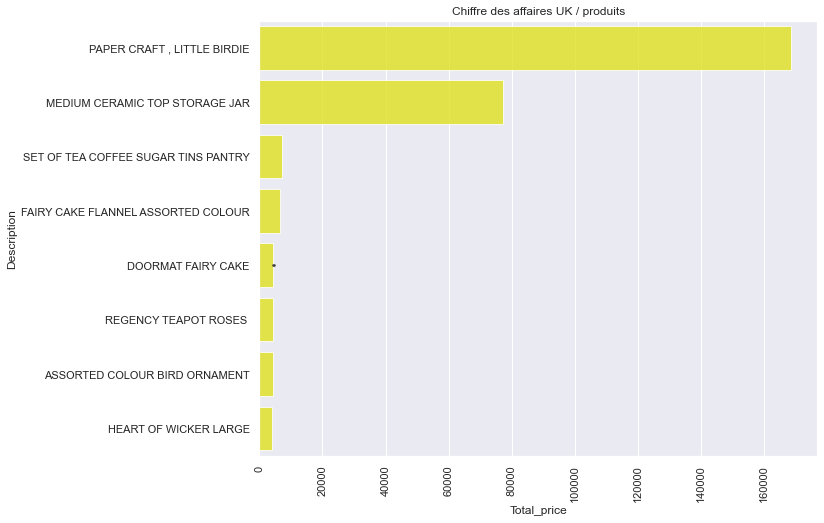

In [324]:
top_uk_df_sale = uk_df.sort_values(by = 'Total_price', ascending = False).head(10)
sns.barplot(y = 'Description', x ='Total_price', data = top_uk_df_sale, color = 'yellow', alpha = .8)
plt.title("Chiffre des affaires UK / produits")
plt.xticks(rotation=90)
plt.savefig("P8_02_graphics/'Chiffre des affaires UK'.jpeg")
plt.show() 


### Quels sont les pays qui passent le plus et le moins de commandes ?

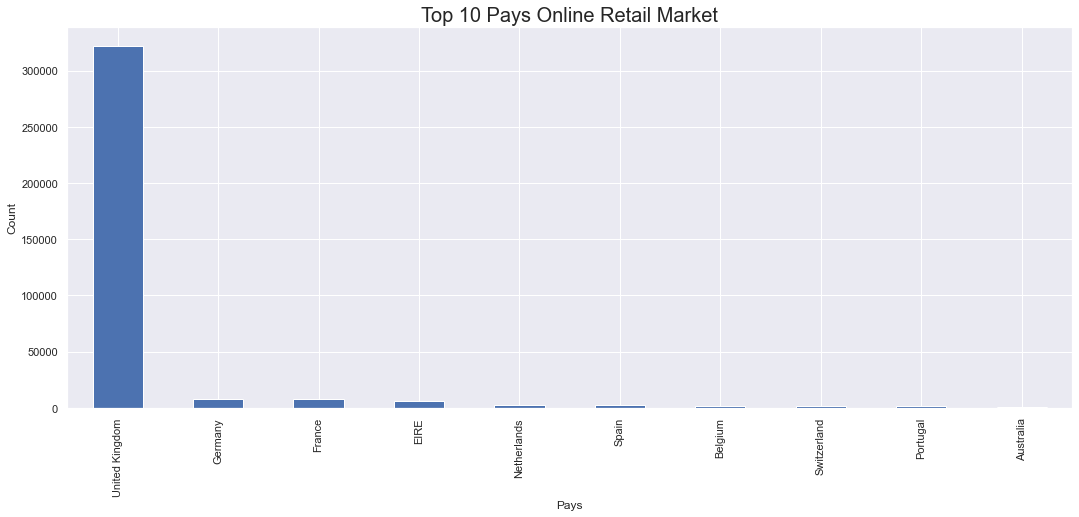

In [325]:
# top 10 countries that buy the most 

df_clean['Country'].value_counts().head(10).plot.bar(figsize = (18, 7))
plt.title('Top 10 Pays Online Retail Market', fontsize = 20)
plt.xlabel('Pays')
plt.ylabel('Count')
plt.savefig("P8_02_graphics/'Top 10 Pays Online Retail Market'.jpeg")
plt.show()

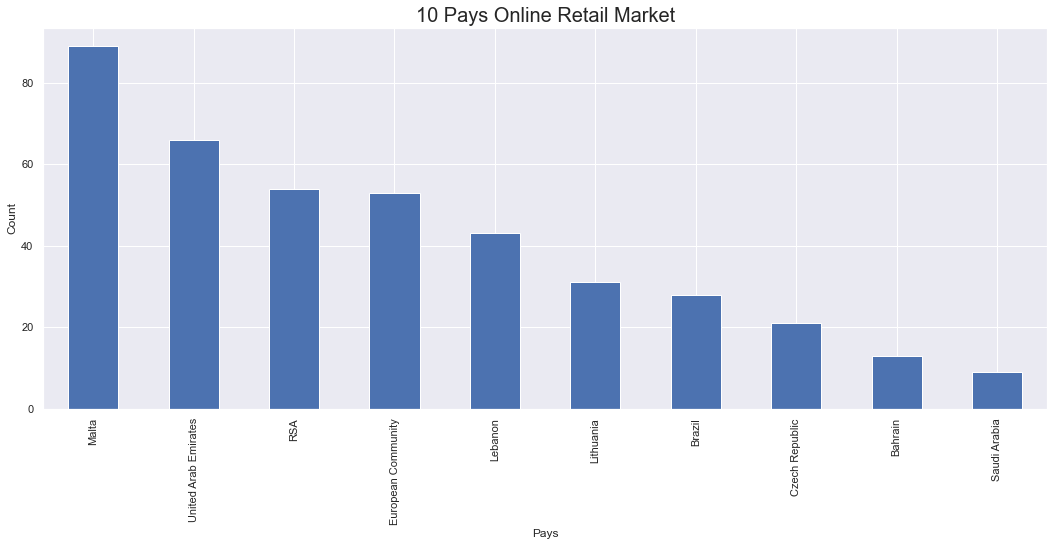

In [326]:
# top 10 countries that buy the least 

df_clean['Country'].value_counts().tail(10).plot.bar(figsize = (18, 7))
plt.title('10 Pays Online Retail Market', fontsize = 20)
plt.xlabel('Pays')
plt.ylabel('Count')
plt.savefig("P8_02_graphics/'10 Pays Online Retail Market'.jpeg")
plt.show()

### Combien de commandes chaque client passe-t-il ?? 

In [327]:
orders = df_clean.groupby(by=['customer_id','Country'],as_index=False)['InvoiceNo'].count()

In [328]:
orders.sort_values(by='InvoiceNo',ascending=False)

,customer_id,Country,InvoiceNo
3990,17841,United Kingdom,7069
1877,14911,EIRE,5088
1289,14096,United Kingdom,4516
331,12748,United Kingdom,4119
1660,14606,United Kingdom,2342
...,...,...,...
2726,16078,United Kingdom,1
2736,16093,United Kingdom,1
2778,16144,United Kingdom,1
2782,16148,United Kingdom,1


The 5 customers ids that make most number of orders are :  17841,14911,14096,12748 and 14606. 4 of them are from UK.

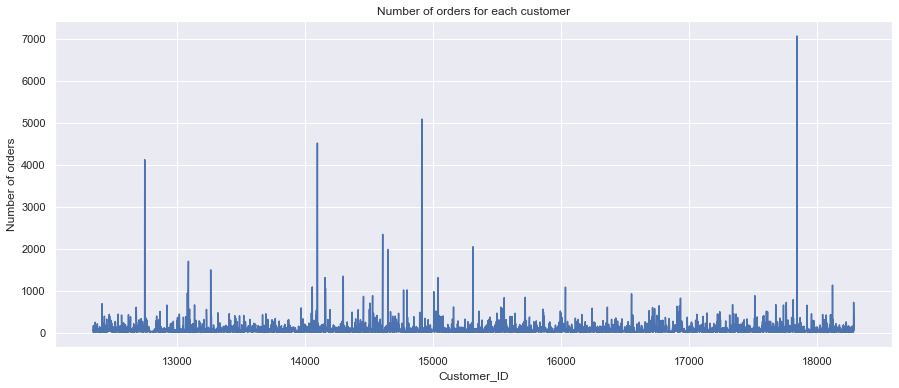

In [329]:
## graphical visualization 

plt.subplots(figsize=(15,6))
plt.plot(orders.customer_id, orders.InvoiceNo)
plt.xlabel('Customer_ID')
plt.ylabel('Number of orders')
plt.title('Number of orders for each customer')
plt.savefig("P8_02_graphics/'Number of orders for each customer'.jpeg")
plt.show()

### Commandes de fréquence par mois, jour et heures

In [330]:
## frequency per month
ax_month = pd.DataFrame(df_clean.groupby(by=['Monthyear']).InvoiceNo.count()).reset_index()

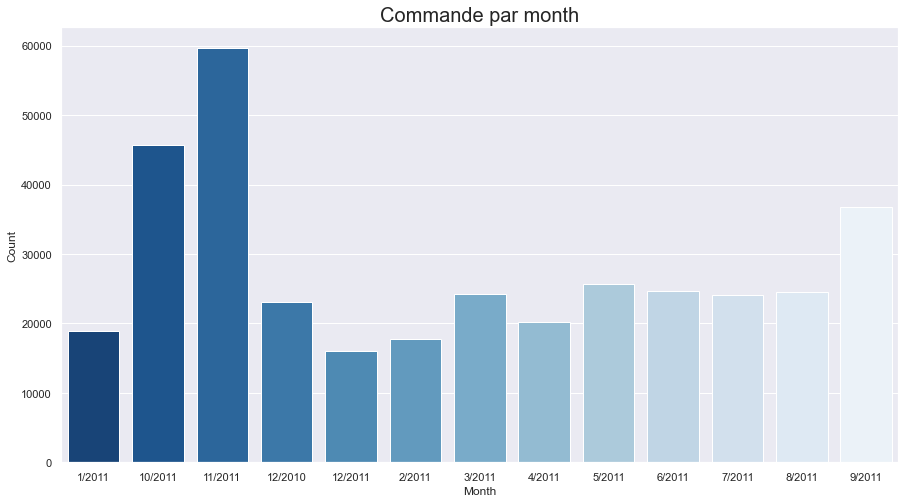

In [331]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Monthyear", y="InvoiceNo", data=ax_month, palette="Blues_r")
plt.title('Commande par month', fontsize = 20)
plt.xlabel('Month')
plt.ylabel('Count')
plt.savefig("P8_02_graphics/'InvoiceNo'.jpeg")
plt.show()

In [332]:
## frequency per day
ax_day = pd.DataFrame(df_clean.groupby(by=['Day_name']).InvoiceNo.count()).reset_index()

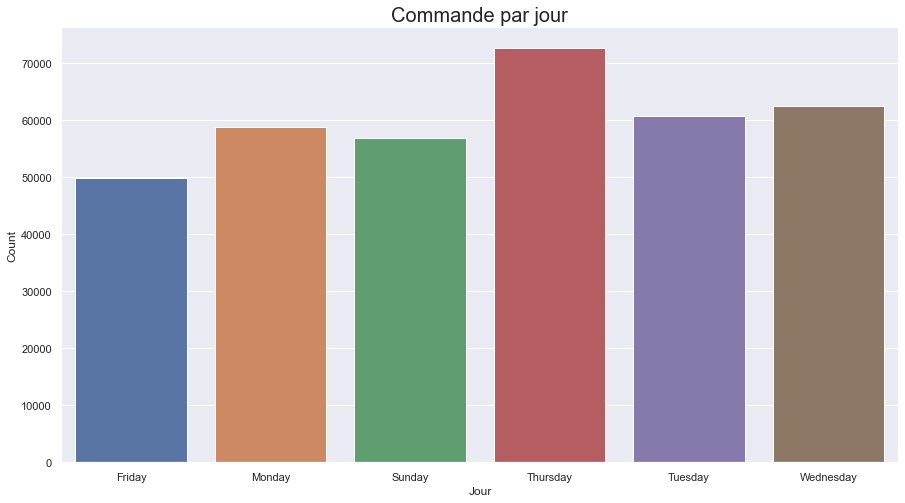

In [333]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Day_name", y="InvoiceNo", data=ax_day)
plt.title('Commande par jour', fontsize = 20)
plt.xlabel('Jour')
plt.ylabel('Count')
plt.savefig("P8_02_graphics/'InvoiceNo par day'.jpeg")
plt.show()

In [334]:
## frequency per hour
ax_hour = pd.DataFrame(df_clean.groupby(by=['Hour']).InvoiceNo.count()).reset_index()

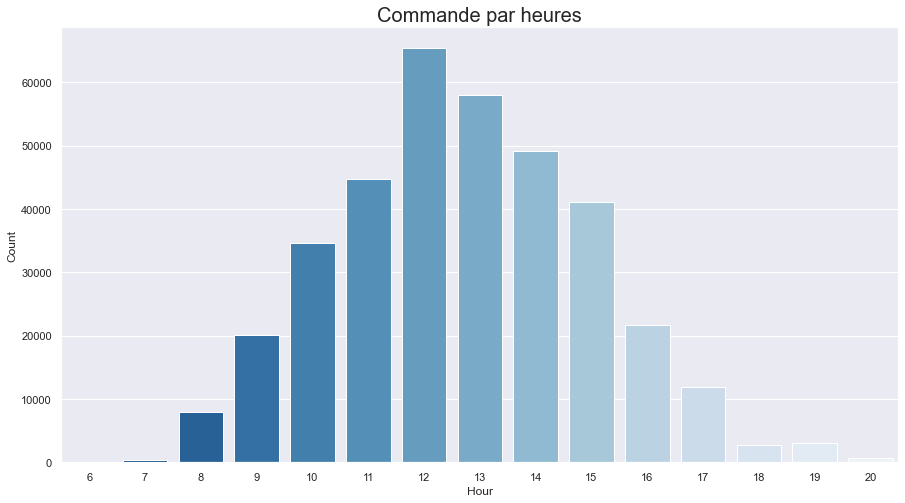

In [335]:

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Hour", y="InvoiceNo", data=ax_hour, palette="Blues_r")
plt.title('Commande par heures', fontsize = 20)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.savefig("P8_02_graphics/'InvoiceNo par heures'.jpeg")
plt.show()

In [336]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,lowercase_descriptions,Invoice_date,IsCancelled,DescriptionLength,...,Day,Day_name,Dayofyear,Date,Daymonth,Daymonthyear,Monthyear,Hour,Minute,Second
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,white metal lantern,2010-12-01 08:26:00,False,19,...,1,Wednesday,335,2010-12-01,1/12,1/12/2010,12/2010,8,26,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom,set 7 babushka nesting boxes,2010-12-01 08:26:00,False,28,...,1,Wednesday,335,2010-12-01,1/12,1/12/2010,12/2010,8,26,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom,glass star frosted t-light holder,2010-12-01 08:26:00,False,33,...,1,Wednesday,335,2010-12-01,1/12,1/12/2010,12/2010,8,26,0
7,536366,22633,HAND WARMER UNION JACK,6,1.85,United Kingdom,hand warmer union jack,2010-12-01 08:28:00,False,22,...,1,Wednesday,335,2010-12-01,1/12,1/12/2010,12/2010,8,28,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,United Kingdom,hand warmer red polka dot,2010-12-01 08:28:00,False,25,...,1,Wednesday,335,2010-12-01,1/12,1/12/2010,12/2010,8,28,0


In [337]:
df_clean["Minute"].describe()

count    361388.000000
mean         30.421804
std          17.093275
min           0.000000
25%          16.000000
50%          31.000000
75%          45.000000
max          59.000000
Name: Minute, dtype: float64

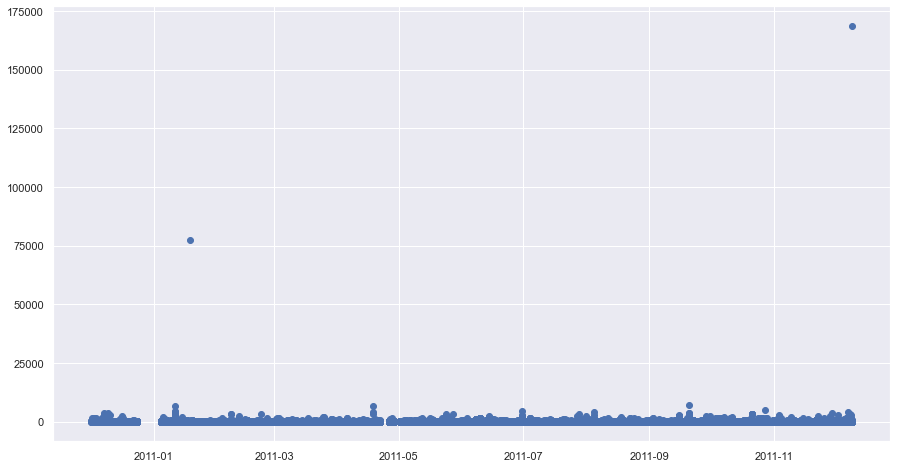

In [338]:
plt.scatter(x=df_clean['Invoice_date'], y=df_clean['Total_price'])
plt.savefig("P8_02_graphics/'Total_price'.jpeg")
plt.show()

In [339]:
df_clean.describe()

,Quantity,UnitPrice,DescriptionLength,LowCharsInDescription,UpCharsInDescription,UK,customer_id,Total_price,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Hour,Minute,Second
count,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.000000,361388.0
mean,13.027419,2.797579,26.647567,0.002410,22.573276,0.891596,15296.731355,21.874370,2010.936287,2.866946,7.644836,31.107046,2.613745,15.051302,216.426777,12.722085,30.421804,0.0
std,187.623415,2.740344,5.238418,0.049203,4.347959,0.310891,1711.774002,315.976823,0.244241,1.118777,3.403440,14.699163,1.927454,8.655924,103.003096,2.274346,17.093275,0.0
min,1.000000,0.120000,9.000000,0.000000,8.000000,0.000000,12346.000000,0.120000,2010.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,6.000000,0.000000,0.0
25%,2.000000,1.250000,23.000000,0.000000,20.000000,1.000000,13969.000000,4.950000,2011.000000,2.000000,5.000000,19.000000,1.000000,7.000000,131.000000,11.000000,16.000000,0.0
50%,6.000000,1.740000,27.000000,0.000000,23.000000,1.000000,15159.000000,11.900000,2011.000000,3.000000,9.000000,35.000000,2.000000,15.000000,244.000000,13.000000,31.000000,0.0
75%,12.000000,3.750000,31.000000,0.000000,26.000000,1.000000,16794.000000,19.800000,2011.000000,4.000000,11.000000,44.000000,4.000000,22.000000,310.000000,14.000000,45.000000,0.0
max,80995.000000,19.960000,35.000000,3.000000,32.000000,1.000000,18287.000000,168469.600000,2011.000000,4.000000,12.000000,51.000000,6.000000,31.000000,357.000000,20.000000,59.000000,0.0



Nous pouvons voir des prix très élevés que nous considérerons comme des valeurs aberrantes. Nous les supprimerons

In [340]:
df_clean = df_clean[df_clean['Total_price'] < 25000]

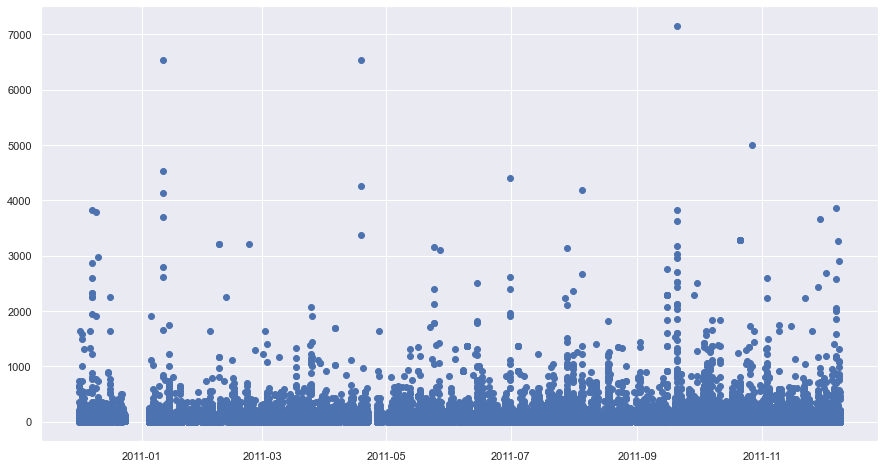

In [341]:
plt.scatter(x=df_clean['Invoice_date'], y=df_clean['Total_price'])
plt.savefig("P8_02_graphics/'Total_price'.jpeg")
plt.show()

In [342]:
#df_clean.quantile([0.05, 0.95, 0.98, 0.99])

In [343]:
df_qt = df_clean[df_clean['Total_price'] < 130]

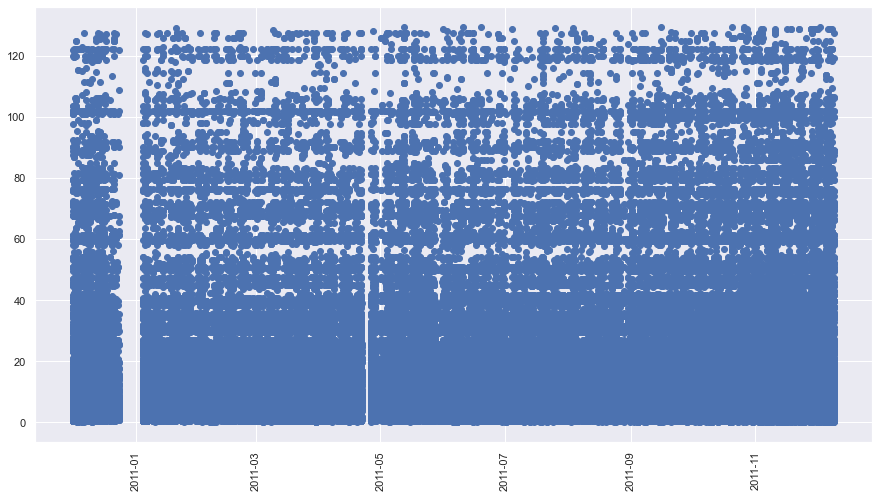

In [344]:
plt.scatter(x=df_qt.Invoice_date, y=df_qt['Total_price'])
plt.xticks(rotation=90)
plt.savefig("P8_02_graphics/'Total_price'.jpeg")
plt.show()

In [345]:
df_qt.describe()

,Quantity,UnitPrice,DescriptionLength,LowCharsInDescription,UpCharsInDescription,UK,customer_id,Total_price,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Hour,Minute,Second
count,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.000000,354326.0
mean,9.646075,2.784335,26.667831,0.002430,22.590177,0.895066,15298.863555,15.453161,2010.936200,2.868796,7.649803,31.128263,2.620321,15.054529,216.581964,12.734772,30.429994,0.0
std,16.653687,2.731134,5.229948,0.049406,4.342651,0.306469,1710.491723,17.183821,0.244397,1.119073,3.404989,14.706389,1.933635,8.659695,103.054086,2.268786,17.092146,0.0
min,1.000000,0.120000,9.000000,0.000000,8.000000,0.000000,12347.000000,0.120000,2010.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,6.000000,0.000000,0.0
25%,2.000000,1.250000,23.000000,0.000000,20.000000,1.000000,13969.000000,4.680000,2011.000000,2.000000,5.000000,19.000000,1.000000,7.000000,131.000000,11.000000,16.000000,0.0
50%,5.000000,1.690000,27.000000,0.000000,23.000000,1.000000,15164.000000,11.580000,2011.000000,3.000000,9.000000,35.000000,2.000000,15.000000,244.000000,13.000000,31.000000,0.0
75%,12.000000,3.750000,31.000000,0.000000,26.000000,1.000000,16795.000000,17.850000,2011.000000,4.000000,11.000000,44.000000,4.000000,22.000000,310.000000,14.000000,45.000000,0.0
max,720.000000,19.960000,35.000000,3.000000,32.000000,1.000000,18287.000000,129.600000,2011.000000,4.000000,12.000000,51.000000,6.000000,31.000000,357.000000,20.000000,59.000000,0.0


## Préparation de la modélisation

In [346]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,lowercase_descriptions,Invoice_date,IsCancelled,DescriptionLength,...,Day,Day_name,Dayofyear,Date,Daymonth,Daymonthyear,Monthyear,Hour,Minute,Second
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,white metal lantern,2010-12-01 08:26:00,False,19,...,1,Wednesday,335,2010-12-01,1/12,1/12/2010,12/2010,8,26,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom,set 7 babushka nesting boxes,2010-12-01 08:26:00,False,28,...,1,Wednesday,335,2010-12-01,1/12,1/12/2010,12/2010,8,26,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom,glass star frosted t-light holder,2010-12-01 08:26:00,False,33,...,1,Wednesday,335,2010-12-01,1/12,1/12/2010,12/2010,8,26,0
7,536366,22633,HAND WARMER UNION JACK,6,1.85,United Kingdom,hand warmer union jack,2010-12-01 08:28:00,False,22,...,1,Wednesday,335,2010-12-01,1/12,1/12/2010,12/2010,8,28,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,United Kingdom,hand warmer red polka dot,2010-12-01 08:28:00,False,25,...,1,Wednesday,335,2010-12-01,1/12,1/12/2010,12/2010,8,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France,pack of 20 spaceboy napkins,2011-12-09 12:50:00,False,27,...,9,Friday,343,2011-12-09,9/12,9/12/2011,12/2011,12,50,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,France,children's apron dolly girl,2011-12-09 12:50:00,False,28,...,9,Friday,343,2011-12-09,9/12,9/12/2011,12/2011,12,50,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France,childrens cutlery dolly girl,2011-12-09 12:50:00,False,29,...,9,Friday,343,2011-12-09,9/12,9/12/2011,12/2011,12,50,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France,childrens cutlery circus parade,2011-12-09 12:50:00,False,31,...,9,Friday,343,2011-12-09,9/12,9/12/2011,12/2011,12,50,0


In [347]:
df_clean_ts = df_clean.set_index('Invoice_date',inplace=True)
df_clean_ts = df_clean[['Total_price']]
df_clean_ts

,Total_price
Invoice_date,
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,25.50
2010-12-01 08:28:00,11.10
2010-12-01 08:28:00,11.10
...,...
2011-12-09 12:50:00,10.20
2011-12-09 12:50:00,12.60
2011-12-09 12:50:00,16.60


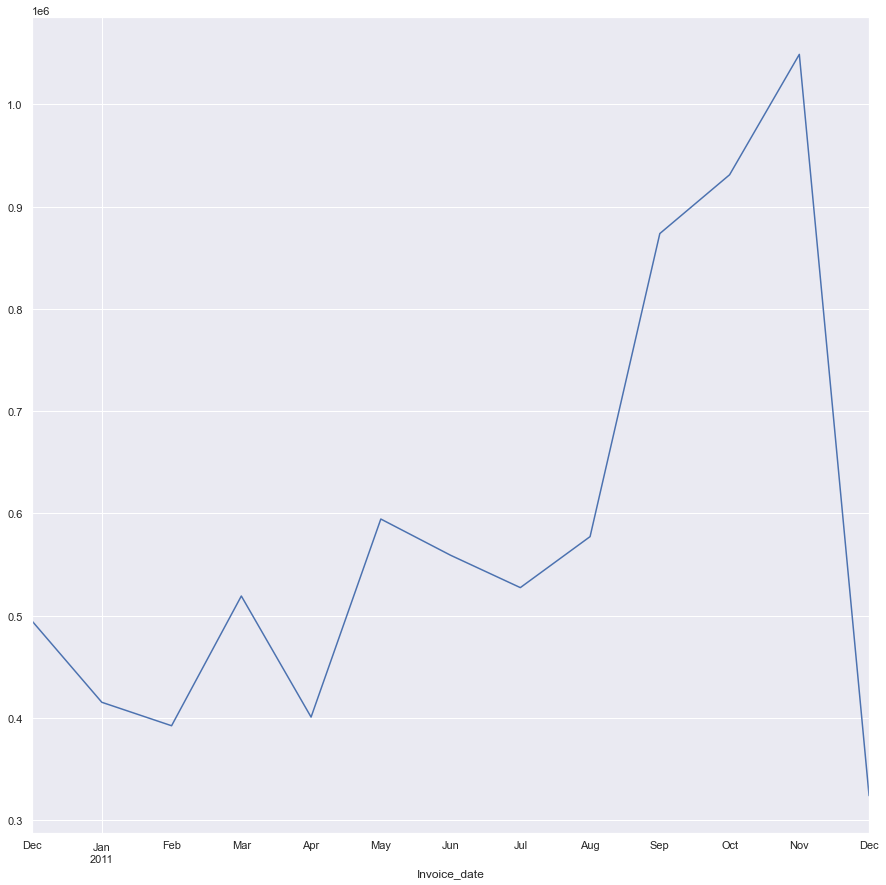

In [348]:
plt.figure(figsize=(15,15))
df_clean_resample = df_clean.resample('M').sum()
df_clean_resample['Total_price'].plot()
plt.savefig("P8_02_graphics/'Total_price - month'.jpeg")
plt.show()

In [349]:
df_clean = df_clean.reset_index()

In [350]:
target_var = df_clean[['Total_price']]
data_ts = df_clean.drop(['Invoice_date','Total_price'],axis=1)

In [351]:
data_clus = df_clean.drop(['Month','Day','Day_name','Monthyear','Hour'],axis=1)

In [352]:
data_clus

,Invoice_date,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,lowercase_descriptions,IsCancelled,DescriptionLength,...,Quarter,Month_name,Week,Weekday,Dayofyear,Date,Daymonth,Daymonthyear,Minute,Second
0,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,white metal lantern,False,19,...,4,December,48,2,335,2010-12-01,1/12,1/12/2010,26,0
1,2010-12-01 08:26:00,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom,set 7 babushka nesting boxes,False,28,...,4,December,48,2,335,2010-12-01,1/12,1/12/2010,26,0
2,2010-12-01 08:26:00,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom,glass star frosted t-light holder,False,33,...,4,December,48,2,335,2010-12-01,1/12,1/12/2010,26,0
3,2010-12-01 08:28:00,536366,22633,HAND WARMER UNION JACK,6,1.85,United Kingdom,hand warmer union jack,False,22,...,4,December,48,2,335,2010-12-01,1/12,1/12/2010,28,0
4,2010-12-01 08:28:00,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,United Kingdom,hand warmer red polka dot,False,25,...,4,December,48,2,335,2010-12-01,1/12,1/12/2010,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361381,2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France,pack of 20 spaceboy napkins,False,27,...,4,December,49,4,343,2011-12-09,9/12,9/12/2011,50,0
361382,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,France,children's apron dolly girl,False,28,...,4,December,49,4,343,2011-12-09,9/12,9/12/2011,50,0
361383,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France,childrens cutlery dolly girl,False,29,...,4,December,49,4,343,2011-12-09,9/12,9/12/2011,50,0
361384,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France,childrens cutlery circus parade,False,31,...,4,December,49,4,343,2011-12-09,9/12,9/12/2011,50,0


In [353]:
#describe the non-numeric features
data_clus.describe(exclude=['float64','int64']).T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Invoice_date,361386,16962,2011-11-14 15:27:00,484,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceNo,361386,18169,576339,484,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,361386,2756,22423,1711,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,361386,2955,REGENCY CAKESTAND 3 TIER,1711,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,361386,36,United Kingdom,322210,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lowercase_descriptions,361386,2955,regency cakestand 3 tier,1711,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsCancelled,361386,1,False,361386,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UK,361386.0,NaN,NaN,NaN,NaT,NaT,0.891595,0.310891,0.0,1.0,1.0,1.0,1.0
Month_name,361386,12,November,59637,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,361386,305,2011-11-06 00:00:00,3175,2010-12-01 00:00:00,2011-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [354]:
#describe the  numeric fearture
data_clus.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,361386.0,12.598006,42.659593,1.00,2.00,6.00,12.00,4800.00
UnitPrice,361386.0,2.797586,2.740350,0.12,1.25,1.74,3.75,19.96
DescriptionLength,361386.0,26.647557,5.238429,9.00,23.00,27.00,31.00,35.00
LowCharsInDescription,361386.0,0.002410,0.049203,0.00,0.00,0.00,0.00,3.00
UpCharsInDescription,361386.0,22.573268,4.347967,8.00,20.00,23.00,26.00,32.00
UK,361386.0,0.891595,0.310891,0.00,1.00,1.00,1.00,1.00
customer_id,361386.0,15296.736340,1711.770634,12347.00,13969.00,15159.00,16794.00,18287.00
Total_price,361386.0,21.194738,69.640244,0.12,4.95,11.90,19.80,7144.72
Year,361386.0,2010.936287,0.244241,2010.00,2011.00,2011.00,2011.00,2011.00
Quarter,361386.0,2.866948,1.118774,1.00,2.00,3.00,4.00,4.00


In [355]:
data_clus.head()

,Invoice_date,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,lowercase_descriptions,IsCancelled,DescriptionLength,...,Quarter,Month_name,Week,Weekday,Dayofyear,Date,Daymonth,Daymonthyear,Minute,Second
0,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,white metal lantern,False,19,...,4,December,48,2,335,2010-12-01,1/12,1/12/2010,26,0
1,2010-12-01 08:26:00,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom,set 7 babushka nesting boxes,False,28,...,4,December,48,2,335,2010-12-01,1/12,1/12/2010,26,0
2,2010-12-01 08:26:00,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom,glass star frosted t-light holder,False,33,...,4,December,48,2,335,2010-12-01,1/12,1/12/2010,26,0
3,2010-12-01 08:28:00,536366,22633,HAND WARMER UNION JACK,6,1.85,United Kingdom,hand warmer union jack,False,22,...,4,December,48,2,335,2010-12-01,1/12,1/12/2010,28,0
4,2010-12-01 08:28:00,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,United Kingdom,hand warmer red polka dot,False,25,...,4,December,48,2,335,2010-12-01,1/12,1/12/2010,28,0


In [356]:
# Total Amount per customer
cust_price=data_clus.groupby('customer_id')['Total_price'].sum().reset_index()
cust_price

,customer_id,Total_price
0,12347,3633.65
1,12348,1437.24
2,12349,1372.42
3,12350,258.00
4,12352,1373.24
...,...,...
4299,18280,180.60
4300,18281,80.82
4301,18282,178.05
4302,18283,1964.26


In [357]:
#number_transaction for each customer:
cust_nb_transactions=data_clus.groupby('customer_id')['InvoiceNo'].count().reset_index()
cust_nb_transactions

,customer_id,InvoiceNo
0,12347,161
1,12348,27
2,12349,68
3,12350,13
4,12352,76
...,...,...
4299,18280,10
4300,18281,7
4301,18282,12
4302,18283,719


<AxesSubplot:xlabel='InvoiceNo', ylabel='customer_id'>

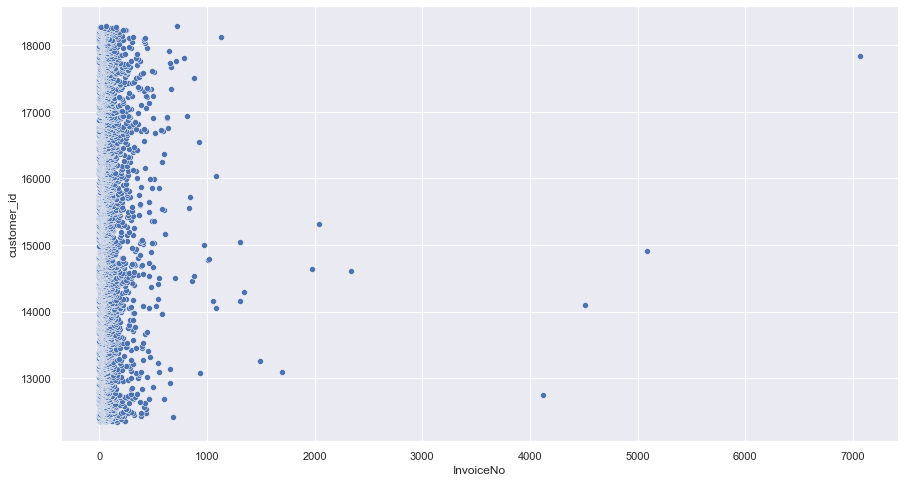

In [358]:
sns.scatterplot(x="InvoiceNo", y="customer_id", data=cust_nb_transactions)

In [359]:
#Last transaction for each customer: 
data_clus['Invoice_date'] = pd.to_datetime(data_clus['Invoice_date'])
data_clus['Last_transaction']=(data_clus['Invoice_date'].max()-data_clus['Invoice_date']).dt.days
cust_last_transaction = data_clus.groupby(['customer_id','Country'])['Last_transaction'].max().reset_index()
cust_last_transaction

,customer_id,Country,Last_transaction
0,12347,Iceland,366
1,12348,Finland,357
2,12349,Italy,18
3,12350,Norway,309
4,12352,Norway,296
...,...,...,...
4306,18280,United Kingdom,277
4307,18281,United Kingdom,180
4308,18282,United Kingdom,125
4309,18283,United Kingdom,336


In [360]:
##join the datasets 

m1 = pd.merge(cust_last_transaction,cust_nb_transactions,how='inner',on='customer_id')
m2 = pd.merge(m1,cust_price,how='inner',on='customer_id')

In [361]:
m2

,customer_id,Country,Last_transaction,InvoiceNo,Total_price
0,12347,Iceland,366,161,3633.65
1,12348,Finland,357,27,1437.24
2,12349,Italy,18,68,1372.42
3,12350,Norway,309,13,258.00
4,12352,Norway,296,76,1373.24
...,...,...,...,...,...
4306,18280,United Kingdom,277,10,180.60
4307,18281,United Kingdom,180,7,80.82
4308,18282,United Kingdom,125,12,178.05
4309,18283,United Kingdom,336,719,1964.26


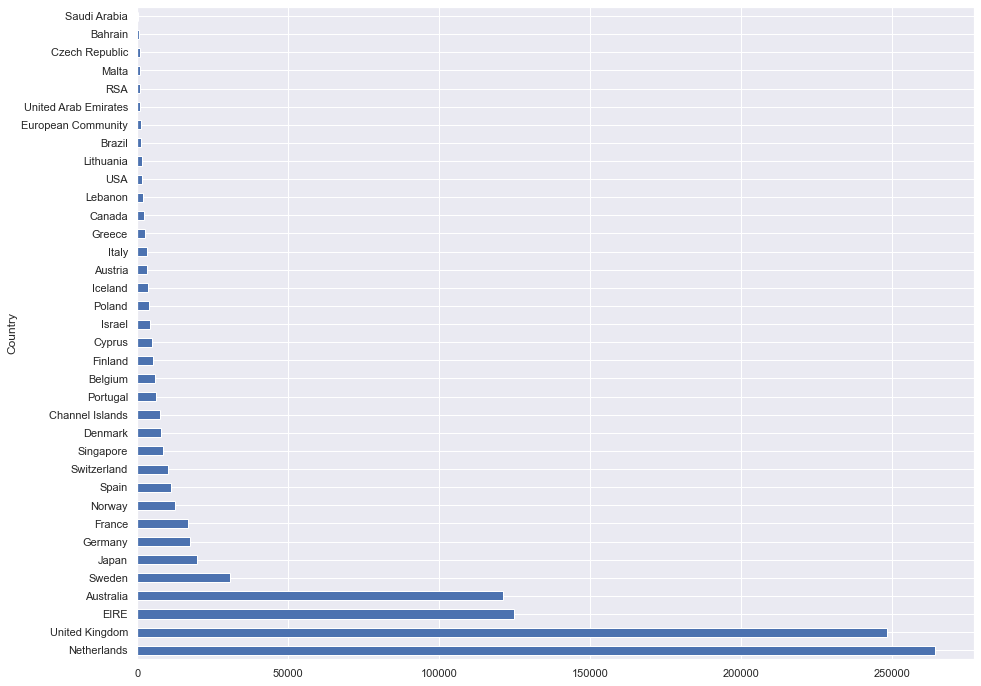

In [362]:
# Group the Maximum Total Amount by Country:
plt.figure(figsize=(15,12))
m2.groupby("Country").Total_price.max().sort_values(ascending=False).plot.barh()
plt.savefig("P8_02_graphics/'Total_price max - Pays'.jpeg")

plt.show()

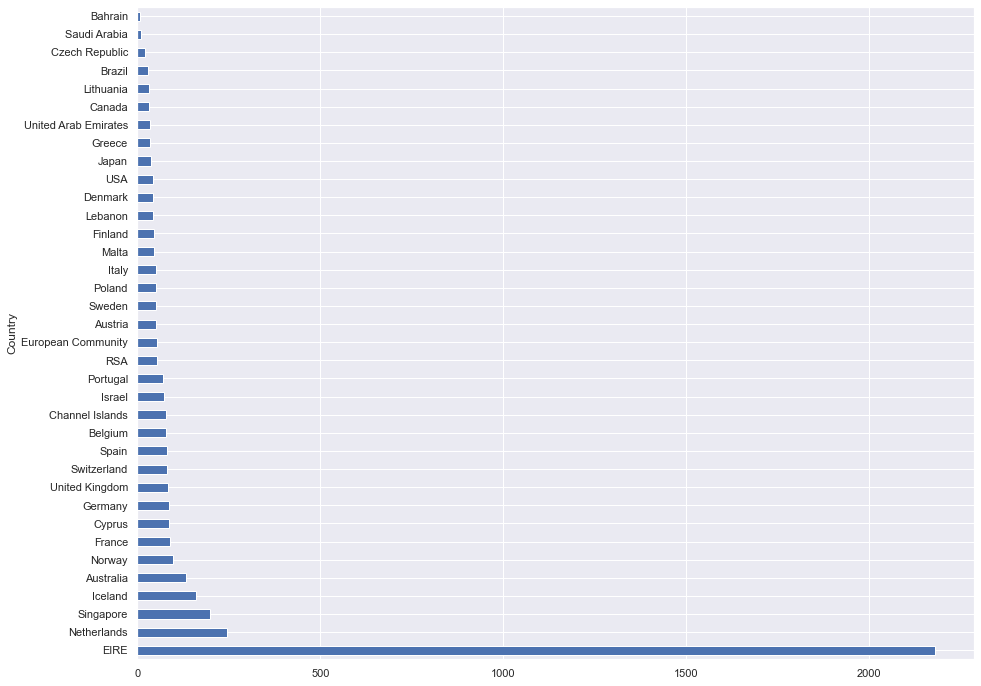

In [363]:
# Group by the Frequency by Country
plt.figure(figsize=(15,12))
m2.groupby("Country").InvoiceNo.mean().sort_values(ascending=False).plot.barh()
plt.savefig("P8_02_graphics/'Facture - Pays'.jpeg")

plt.show()


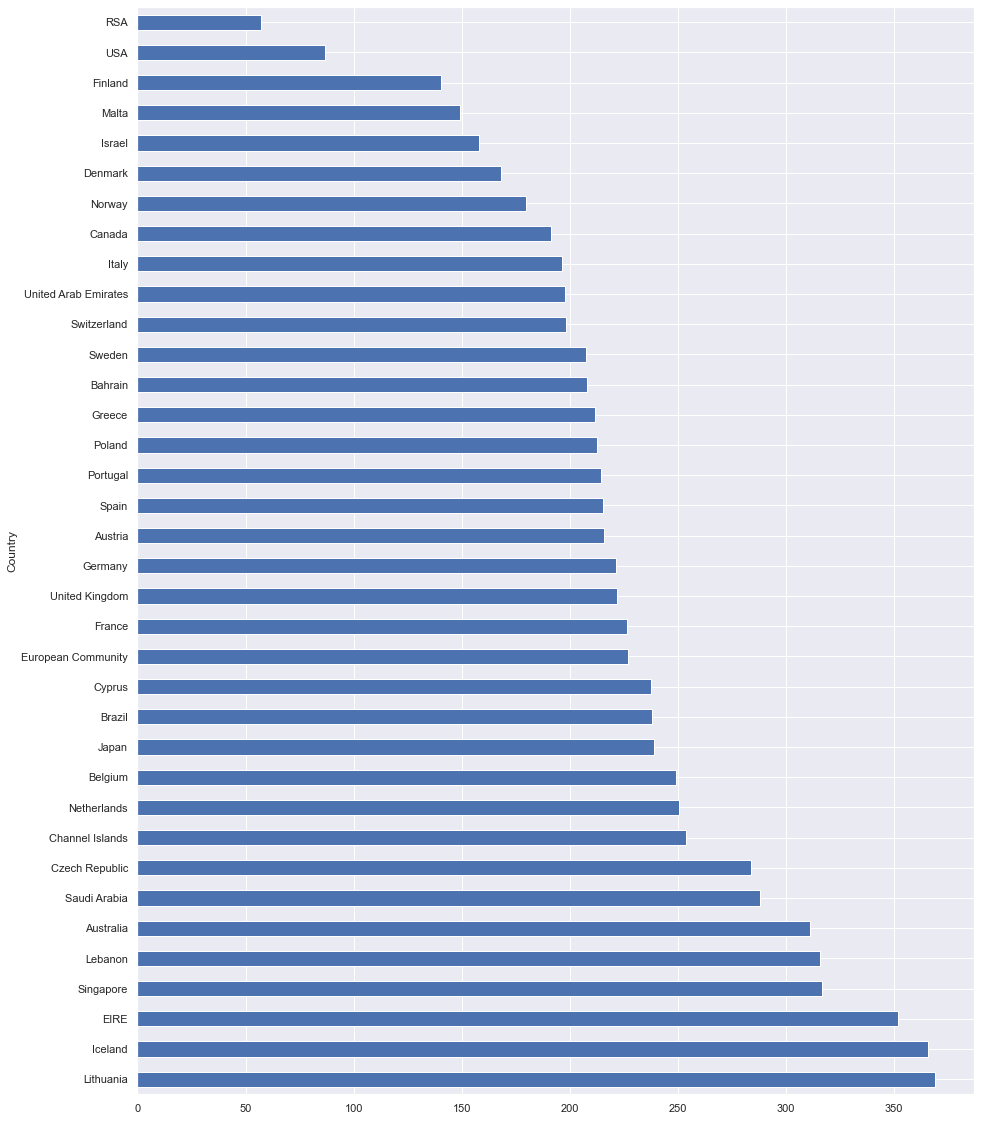

In [364]:
#countries that shop most recently
plt.figure(figsize=(15,20))
m2.groupby("Country").Last_transaction.mean().sort_values(ascending=False).plot.barh()
plt.savefig("P8_02_graphics/'Last_transaction- Pays'.jpeg")


plt.show()

En moyenne, les clients belges achètent le plus fréquemment.

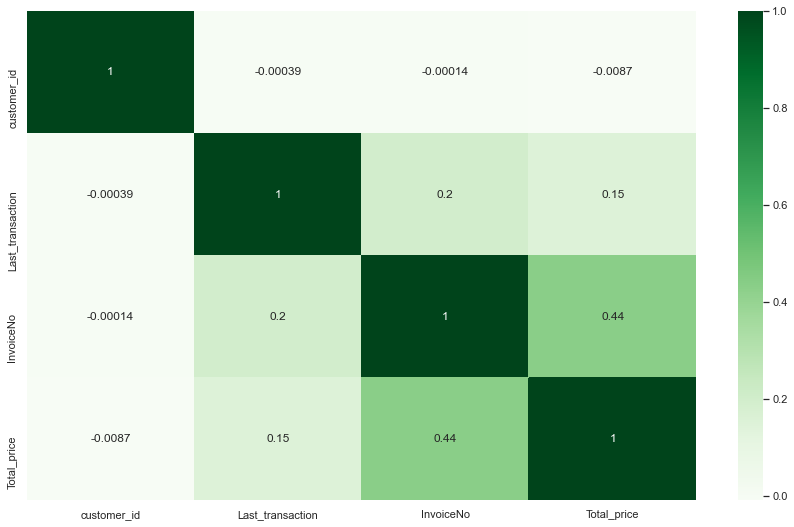

In [365]:
plt.figure(figsize=(15,9))
sns.heatmap(m2.corr(),cmap="Greens", annot=True)
plt.savefig("P8_02_graphics/'heatmap'.jpeg")
plt.show()

Chaque carré montre la corrélation entre les variables sur chaque axe.

Des valeurs plus proches de zéro signifient qu'il n'y a pas de tendance linéaire entre les deux variables.

Plus la corrélation est proche de 1, plus elles sont corrélées positivement ;

Une corrélation plus proche de -1 est similaire, mais au lieu d'augmenter les deux, une variable diminuera à mesure que l'autre augmentera.

Comme le montre la carte thermique, Total Amount et InvoiceNo sont corrélés positivement

In [366]:
m2.head()

,customer_id,Country,Last_transaction,InvoiceNo,Total_price
0,12347,Iceland,366,161,3633.65
1,12348,Finland,357,27,1437.24
2,12349,Italy,18,68,1372.42
3,12350,Norway,309,13,258.00
4,12352,Norway,296,76,1373.24


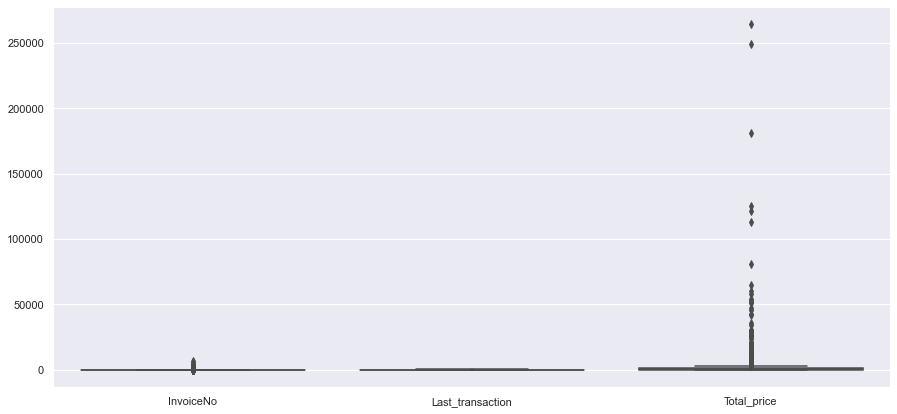

In [367]:
plt.figure(figsize=(15,7))
sns.boxplot(data = m2[['InvoiceNo','Last_transaction','Total_price']])
plt.savefig("P8_02_graphics/'boxplot'.jpeg")
plt.show()

Comme le montre le graphique, il existe de nombreuses valeurs aberrantes dans la fonction TotalAmount. Laissons-les tomber !

In [368]:
IQR= m2['Total_price'].quantile(0.75)-m2['Total_price'].quantile(0.25)
lower_limit= m2['Total_price'].quantile(0.25) - 1.5*IQR
upper_limit=m2['Total_price'].quantile(0.75) + 1.5*IQR
k=m2[m2['Total_price']>upper_limit]
m=m2[m2['Total_price']<lower_limit]
df_iqr=m2[(m2['Total_price']<upper_limit) & (m2['Total_price']>lower_limit)]
print('Data shape before removing outlier',m2.shape)
print('Data shape after removing outlier',df_iqr.shape)
print('Total number of outlier:',len(k)+len(m))

Data shape before removing outlier (4311, 5)
Data shape after removing outlier (3898, 5)
Total number of outlier: 413


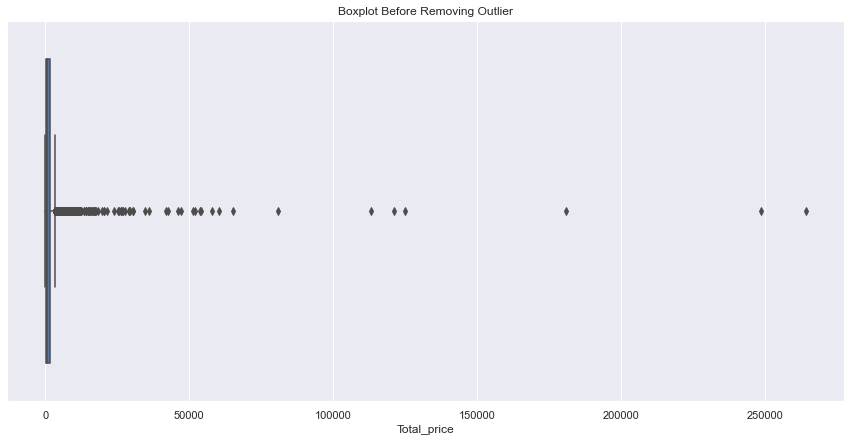

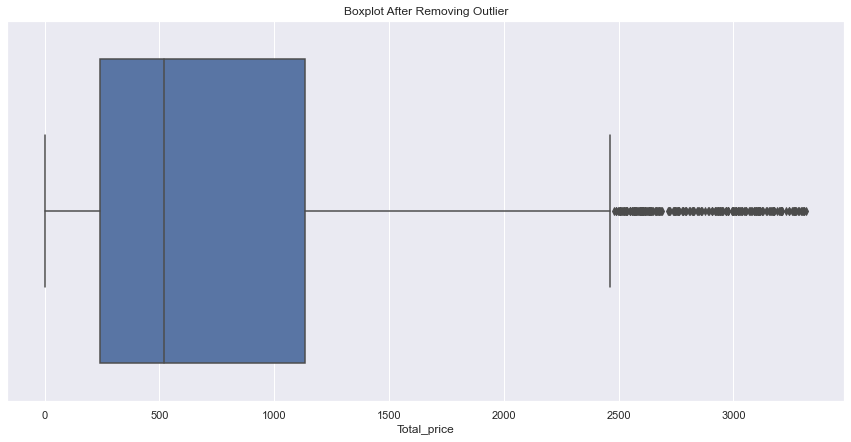

In [369]:
#### plot the boxplot before and after remove the outlier
plt.figure(figsize=(15,7))
sns.boxplot(m2['Total_price'])
plt.title('Boxplot Before Removing Outlier')
plt.savefig("P8_02_graphics/'Boxplot Before Removing Outlier'.jpeg")
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(df_iqr['Total_price'])
plt.title('Boxplot After Removing Outlier')
plt.savefig("P8_02_graphics/'Boxplot After Removing Outlier'.jpeg")
plt.show()

In [370]:
### The new data frame after removing outlier
df_iqr.reset_index(drop=True, inplace= True)
df_iqr

,customer_id,Country,Last_transaction,InvoiceNo,Total_price
0,12348,Finland,357,27,1437.24
1,12349,Italy,18,68,1372.42
2,12350,Norway,309,13,258.00
3,12352,Norway,296,76,1373.24
4,12353,Bahrain,203,4,89.00
...,...,...,...,...,...
3893,18280,United Kingdom,277,10,180.60
3894,18281,United Kingdom,180,7,80.82
3895,18282,United Kingdom,125,12,178.05
3896,18283,United Kingdom,336,719,1964.26


Mise à l'échelle des données numériques :
La mise à l'échelle est utilisée pour rendre les points de données généralisés afin que la distance entre eux soit plus faible.

Les deux techniques les plus populaires pour mettre à l'échelle les données numériques avant la modélisation sont la normalisation et la standardisation.

La normalisation met à l'échelle chaque variable d'entrée séparément dans la plage 0-1
La normalisation met à l'échelle chaque variable d'entrée séparément en soustrayant la moyenne (appelée centrage) et en divisant par l'écart type pour décaler la distribution pour avoir une moyenne de zéro et un écart type de un
Je vais normaliser les données dans cet échantillon 

In [371]:
### scaling

#num_data = df_iqr[['Last_transaction','InvoiceNo','Total_price']]
scaler = MinMaxScaler()
#scaled_data = pd.DataFrame(scaler.fit_transform(num_data))
#scaled_data.columns = ['Last_transaction','InvoiceNo','Total_price']
#scaled_data['Country'] = m2['Country']

In [372]:
df_iqr[['Last_transaction_scaled','InvoiceNo_scaled','Total_price_scaled']] = scaler.fit_transform(df_iqr[['Last_transaction','InvoiceNo','Total_price']] )



In [373]:
df_iqr

,customer_id,Country,Last_transaction,InvoiceNo,Total_price,Last_transaction_scaled,InvoiceNo_scaled,Total_price_scaled
0,12348,Finland,357,27,1437.24,0.957105,0.030197,0.432848
1,12349,Italy,18,68,1372.42,0.048257,0.077816,0.413287
2,12350,Norway,309,13,258.00,0.828418,0.013937,0.076983
3,12352,Norway,296,76,1373.24,0.793566,0.087108,0.413534
4,12353,Bahrain,203,4,89.00,0.544236,0.003484,0.025983
...,...,...,...,...,...,...,...,...
3893,18280,United Kingdom,277,10,180.60,0.742627,0.010453,0.053625
3894,18281,United Kingdom,180,7,80.82,0.482574,0.006969,0.023514
3895,18282,United Kingdom,125,12,178.05,0.335121,0.012776,0.052856
3896,18283,United Kingdom,336,719,1964.26,0.900804,0.833914,0.591889


Pour mieux comprendre le comportement d'achat des clients, je vais analyser la segmentation des clients.

Dans ce noyau, je développerai plusieurs modèles de clustering pour mieux comprendre la segmentation des clients et identifier les stratégies commerciales pour chaque type de client.

Les modèles de clustering que je vais utiliser sont :

Les clusters K-means : Méthode du coude
Clusters K-means : Méthode Silhouette
Clustering agglomératif hiérarchique
Modèle de mélange gaussien


## Modeling

L'objectif de ce projet est de regrouper les clients.

La première étape consiste à déterminer le nombre optimal de clusters de nos données. Pour cette raison, nous utiliserons deux méthodes différentes : la méthode du coude et la méthode de la silhouette.
**Elbow** and **silhouette** method .

### Elbow method

In [374]:
from sklearn.cluster import KMeans

In [375]:
#scaled_data.head()

In [376]:
df_elbow = df_iqr.drop(columns=['Country'],axis=1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_elbow)
    distortions.append(kmeanModel.inertia_)

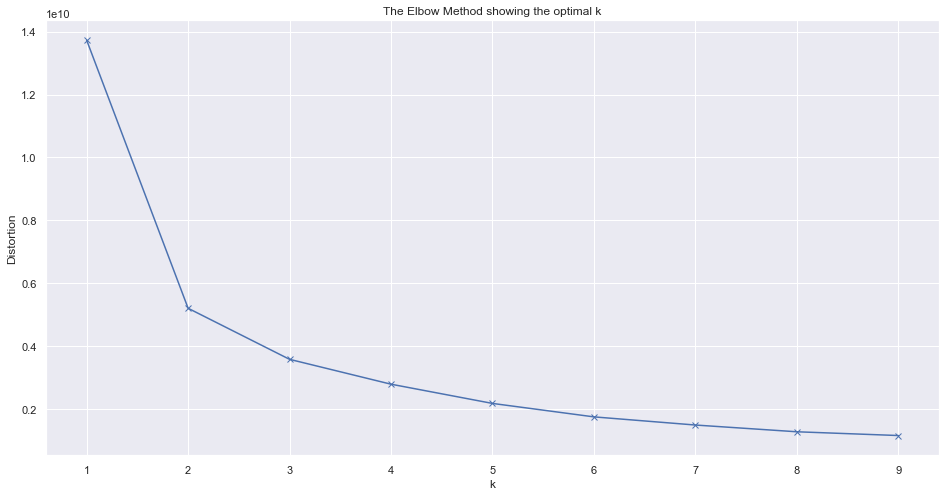

In [377]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig("P8_02_graphics/'The Elbow Method showing the optimal k'.jpeg")
plt.show()

Nous pouvons voir que la valeur optimale trouvée par la méthode du coude est 3.

### Silhouette method

In [378]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):    
    kmeans = KMeans(n_clusters = k).fit(df_elbow)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_elbow, labels, metric = 'euclidean'))

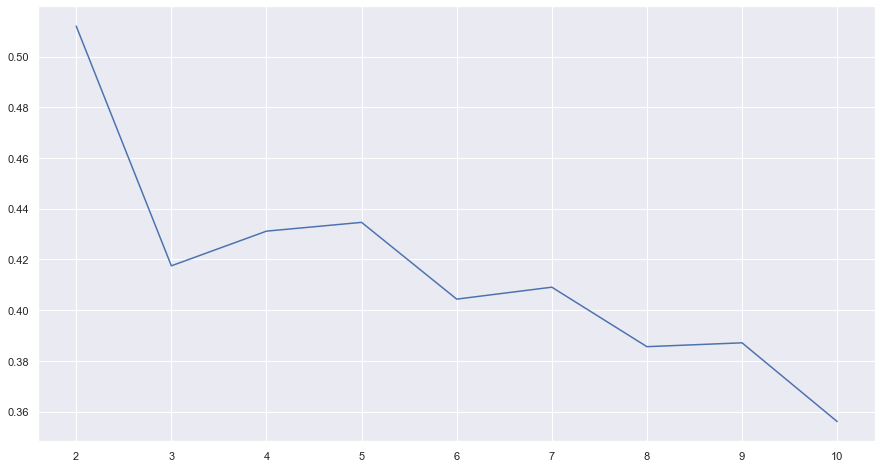

In [379]:
plt.plot(range(2,11),sil)
plt.savefig("P8_02_graphics/'silhouette'.jpeg")
plt.show()

**Silhouette Analysis**


silhouette score=p−q/max(p,q)
 
p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [380]:
# Add the number of cluster columns in the data frame
#km = KMeans(n_clusters=3)
#y_predicted = km.fit_predict(df_elbow)
#df_elbow['clusters']= y_predicted
#df_elbow

In [381]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(pd.DataFrame(df_iqr[['Last_transaction_scaled','InvoiceNo_scaled','Total_price_scaled']]))
df_iqr['clusters']= y_predicted
df_iqr


,customer_id,Country,Last_transaction,InvoiceNo,Total_price,Last_transaction_scaled,InvoiceNo_scaled,Total_price_scaled,clusters
0,12348,Finland,357,27,1437.24,0.957105,0.030197,0.432848,2
1,12349,Italy,18,68,1372.42,0.048257,0.077816,0.413287,1
2,12350,Norway,309,13,258.00,0.828418,0.013937,0.076983,0
3,12352,Norway,296,76,1373.24,0.793566,0.087108,0.413534,2
4,12353,Bahrain,203,4,89.00,0.544236,0.003484,0.025983,0
...,...,...,...,...,...,...,...,...,...
3893,18280,United Kingdom,277,10,180.60,0.742627,0.010453,0.053625,0
3894,18281,United Kingdom,180,7,80.82,0.482574,0.006969,0.023514,1
3895,18282,United Kingdom,125,12,178.05,0.335121,0.012776,0.052856,1
3896,18283,United Kingdom,336,719,1964.26,0.900804,0.833914,0.591889,2


<AxesSubplot:xlabel='clusters', ylabel='Total_price'>

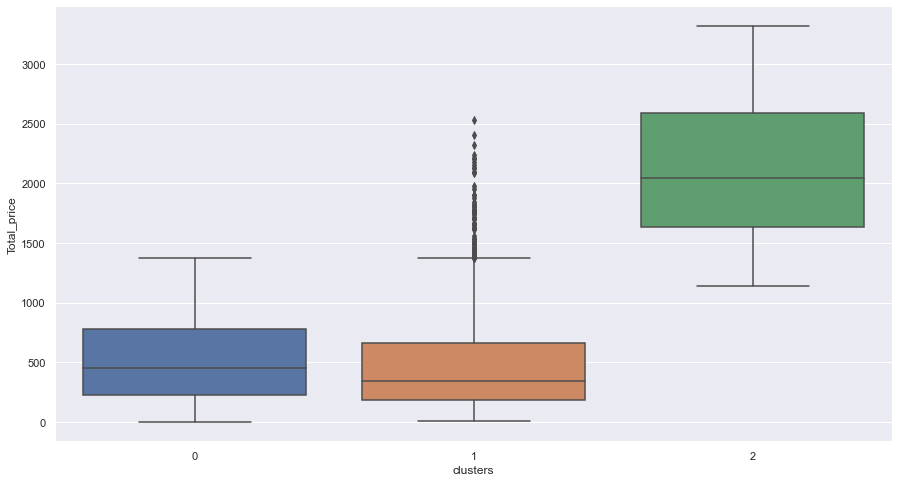

In [382]:
sns.boxplot(x='clusters', y='Total_price', data=df_iqr)

In [383]:
df_elbow = df_iqr[['Last_transaction_scaled','InvoiceNo_scaled','Total_price_scaled','clusters']]

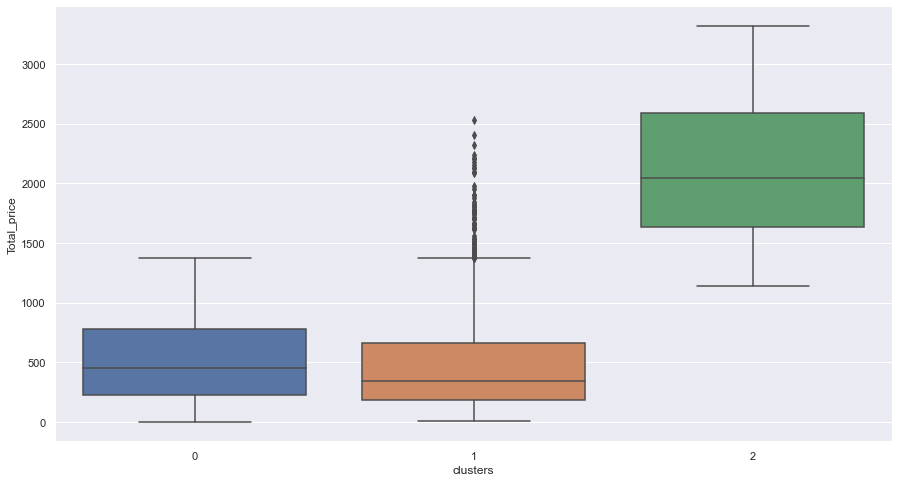

In [384]:
sns.boxplot(x='clusters', y='Total_price', data=df_iqr)
plt.savefig("P8_02_graphics/'boxplot_Total_price'.jpeg")
plt.show()

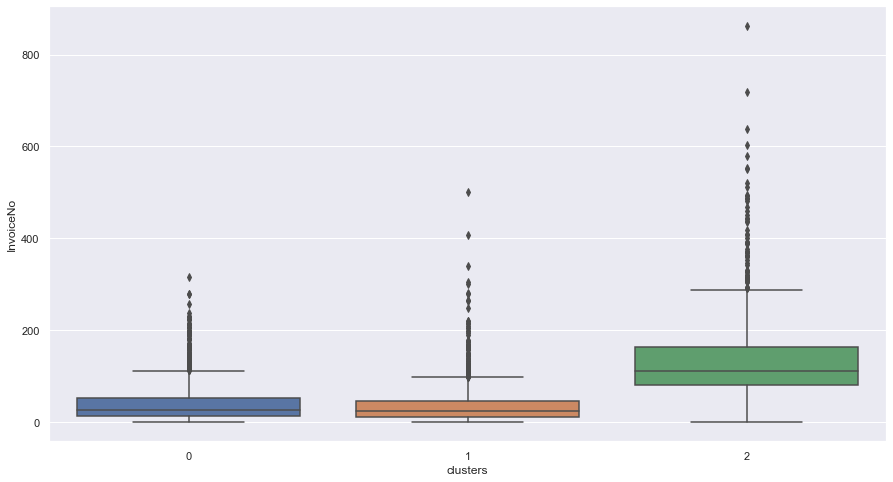

In [385]:
sns.boxplot(x='clusters', y='InvoiceNo', data=df_iqr)
plt.savefig("P8_02_graphics/'boxplot_Frequency'.jpeg")
plt.show()

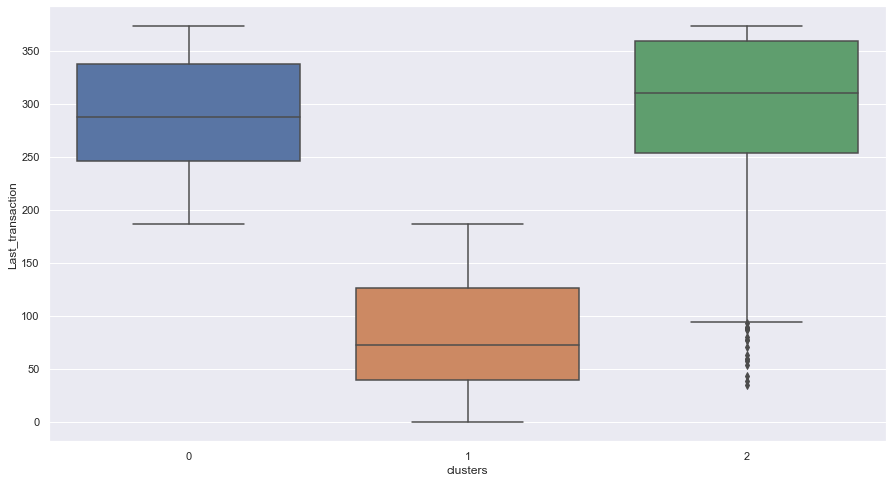

In [386]:
sns.boxplot(x='clusters', y='Last_transaction', data=df_iqr)
plt.savefig("P8_02_graphics/'boxplot_Last_transaction'.jpeg")
plt.show()

Clustering K-Means avec 3 identifiants de cluster

Les clients avec l'ID de cluster 2 sont les clients avec un nombre élevé de transactions par rapport aux autres clients.

Les clients avec l'ID de cluster 2 sont des acheteurs fréquents.

Les clients avec l'ID de cluster 1 sont des acheteurs qui achétent le plus.

Les clients avec le Cluster Id 0 ne sont pas des acheteurs récents et donc moins importants du point de vue commercial. 

In [387]:
# Cluster centroid:
km.cluster_centers_

array([[0.77809566, 0.04428384, 0.15737691],
       [0.2207974 , 0.0408502 , 0.14591401],
       [0.78917209, 0.16119671, 0.64319826]])

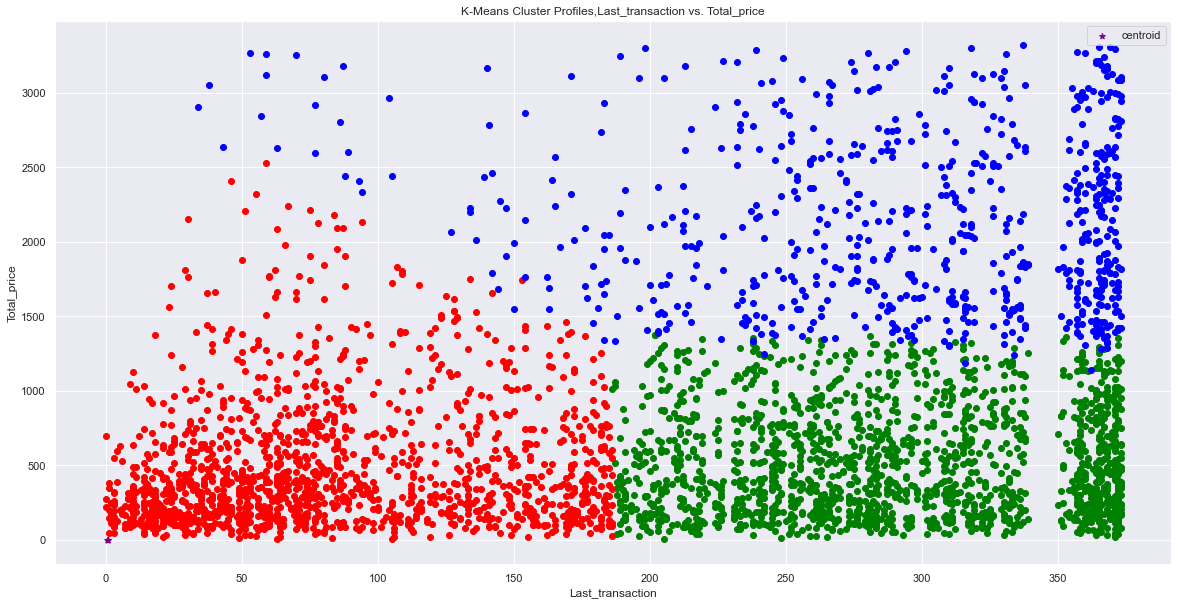

In [388]:
# Visualize the clusters with original data
df_iqr['clusters']= y_predicted
df1 = df_iqr[df_iqr.clusters==0]
df2 = df_iqr[df_iqr.clusters==1]
df3 = df_iqr[df_iqr.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['Total_price'],color='green')
plt.scatter(df2.Last_transaction,df2['Total_price'],color='red')
plt.scatter(df3.Last_transaction,df3['Total_price'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('Total_price')
plt.title('K-Means Cluster Profiles,Last_transaction vs. Total_price')
plt.savefig("P8_02_graphics/'K-Means Cluster Profiles,Last_transaction vs. Total_price'.jpeg")
plt.show()

Le modèle K-Means segmente les données en clusters distincts en fonction de la récence (dernière transaction) et de la valeur monétaire (montant total) du client.

Le cluster 0 est composé de clients dont la dernière_transaction se situe entre 0 et 180 jours et dont le montant total dépensé est compris entre 0 et £ 2 500  ;

Le groupe 1 est composé de clients dont la dernière_transaction remonte à 180 et 400 jours et dont le montant total a été dépensé entre 0 et £ 1 500   ;

Le groupe 2 est composé de clients dont la dernière_transaction remonte à 50 et 400 jours et dont le montant total a été dépensé entre £ 1 500  et £ 3 500  . 

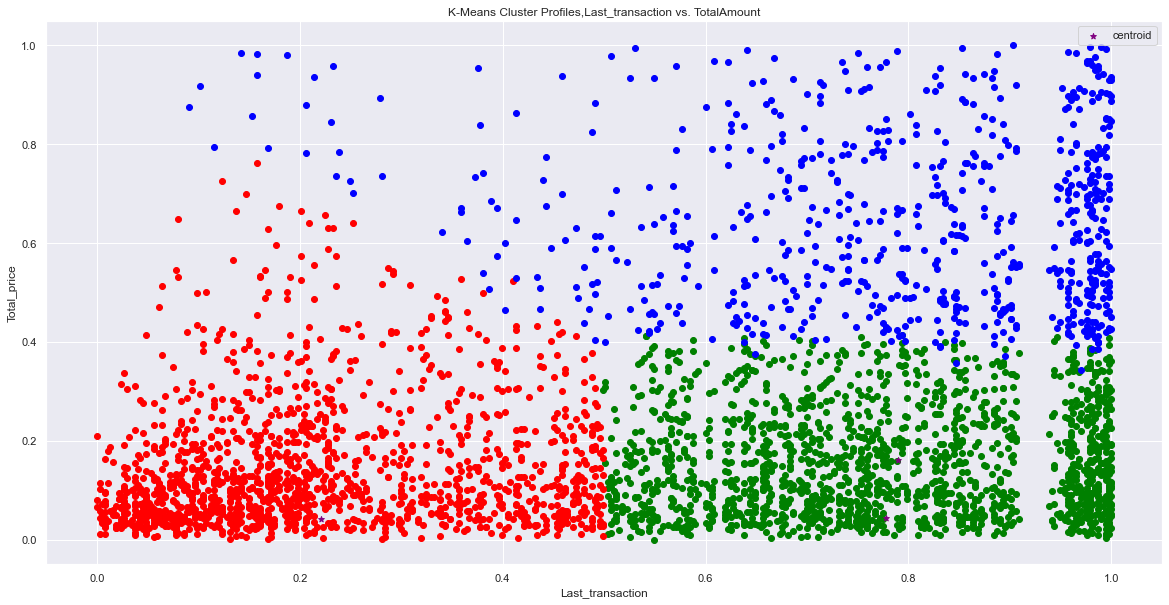

In [389]:
# Visualize the clusters with scaled data:
df1 = df_elbow[df_elbow.clusters==0]
df2 = df_elbow[df_elbow.clusters==1]
df3 = df_elbow[df_elbow.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction_scaled,df1['Total_price_scaled'],color='green')
plt.scatter(df2.Last_transaction_scaled,df2['Total_price_scaled'],color='red')
plt.scatter(df3.Last_transaction_scaled,df3['Total_price_scaled'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('Total_price')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.savefig("P8_02_graphics/'K-Means Cluster Profiles,Last_transaction vs. Total_price-1'.jpeg")
plt.show()


 **Hierarchical Agglomerative Clustering**

Dans le clustering agglomératif, la formation du cluster commence par des points individuels. Chaque point est considéré comme un cluster.

Disons qu'il y a N points de données. Au début, il y aura N clusters.

Ensuite, la distance entre chaque paire de clusters est trouvée et les clusters les plus proches les uns des autres sont appariés et constitués en un seul cluster. Cela se traduirait par (N - 1) cluster.

À l'étape suivante, la distance entre les paires de clusters est trouvée et les clusters les plus proches les uns des autres sont appariés et constitués en un seul cluster.

Cela donnerait (N – 2) grappes. Le même processus est répété jusqu'à ce que tous les points de données soient fusionnés en un seul cluster. par exemple, cluster racine. 

In [390]:
df_elbow_new = df_iqr[['Last_transaction_scaled','InvoiceNo_scaled','Total_price_scaled','clusters']]

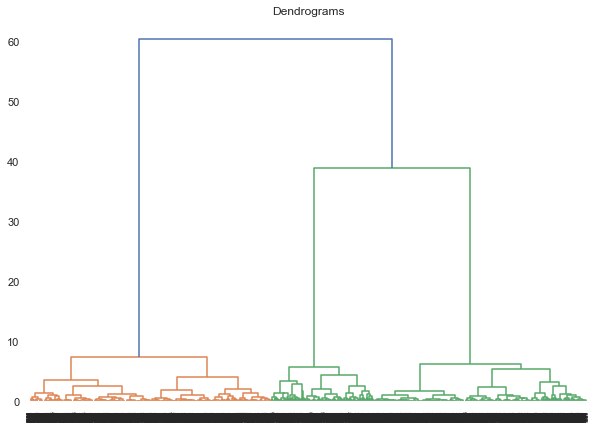

In [391]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_elbow_new, method='ward'))
plt.savefig("P8_02_graphics/'Dendrograms'.jpeg")
plt.show()

Based on the above dendogram, lets select different number of clusters and create plot based on slicing the dendogram at different levels.

Level 1: graph belows show in the first level there will be 2 clusters in the data

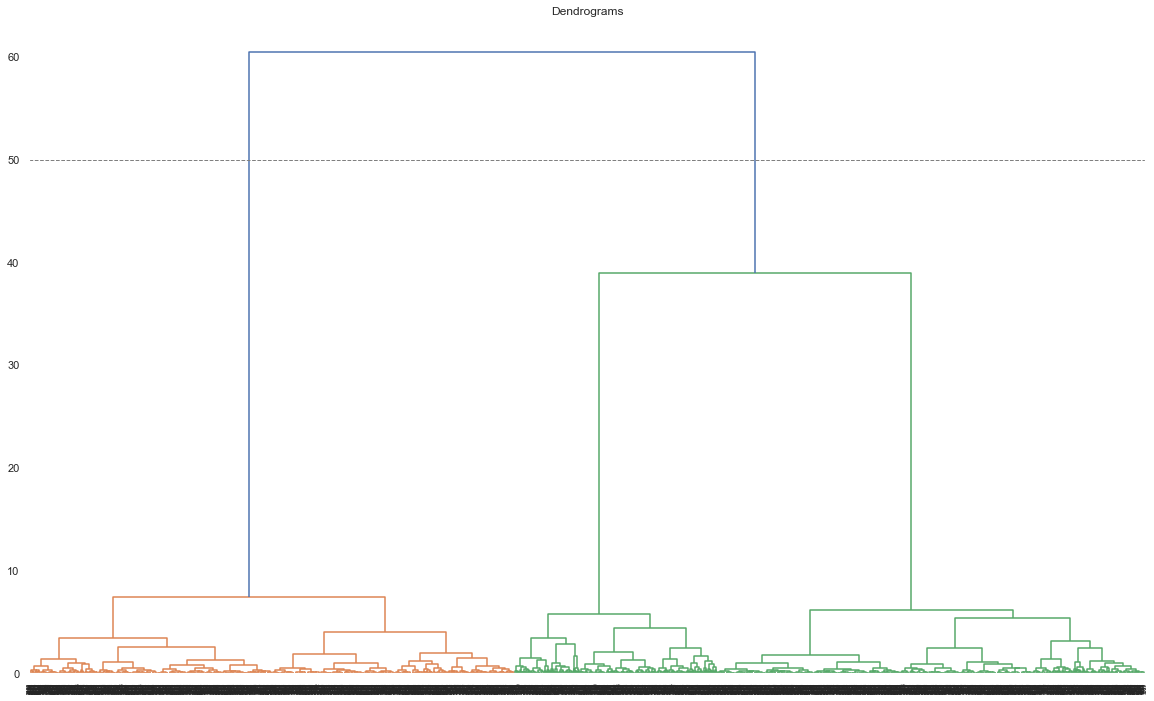

In [392]:
plt.figure(figsize=(20, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_elbow_new, method='ward'))
plt.axhline(y=50, c='grey', lw=1, linestyle='dashed')
plt.savefig("P8_02_graphics/'Dendrograms'.jpeg")
plt.show()


Level 2: graph belows show in the first level there will be 3 clusters in the data

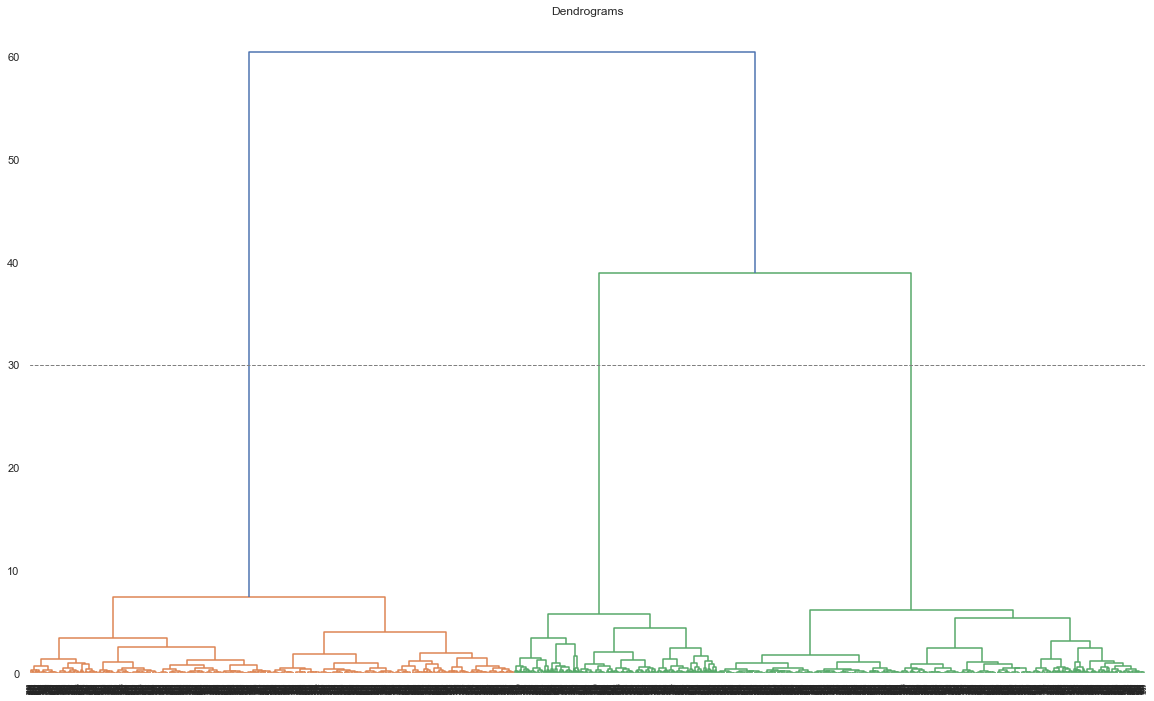

In [393]:
plt.figure(figsize=(20, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_elbow_new, method='ward'))
plt.axhline(y=30, c='grey', lw=1, linestyle='dashed')
plt.savefig("P8_02_graphics/'Dendrograms'.jpeg")

plt.show()

Ensuite, je vais visualiser les données avec les clusters 2 et 3 respectivement et essayer d'apporter quelques informations.

Regroupons d'abord le pays en fonction du nombre de clusters : 

In [394]:
from sklearn.cluster import AgglomerativeClustering

cluster_new = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
two_clusters=cluster_new.fit_predict(df_elbow)

cluster_new = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
three_clusters=cluster_new.fit_predict(df_elbow)

df_elbow['two_clusters'] = two_clusters
df_elbow['three_clusters']= three_clusters
df_elbow

,Last_transaction_scaled,InvoiceNo_scaled,Total_price_scaled,clusters,two_clusters,three_clusters
0,0.957105,0.030197,0.432848,2,0,2
1,0.048257,0.077816,0.413287,1,0,1
2,0.828418,0.013937,0.076983,0,1,0
3,0.793566,0.087108,0.413534,2,0,2
4,0.544236,0.003484,0.025983,0,1,0
...,...,...,...,...,...,...
3893,0.742627,0.010453,0.053625,0,1,0
3894,0.482574,0.006969,0.023514,1,0,1
3895,0.335121,0.012776,0.052856,1,0,1
3896,0.900804,0.833914,0.591889,2,0,2


No handles with labels found to put in legend.


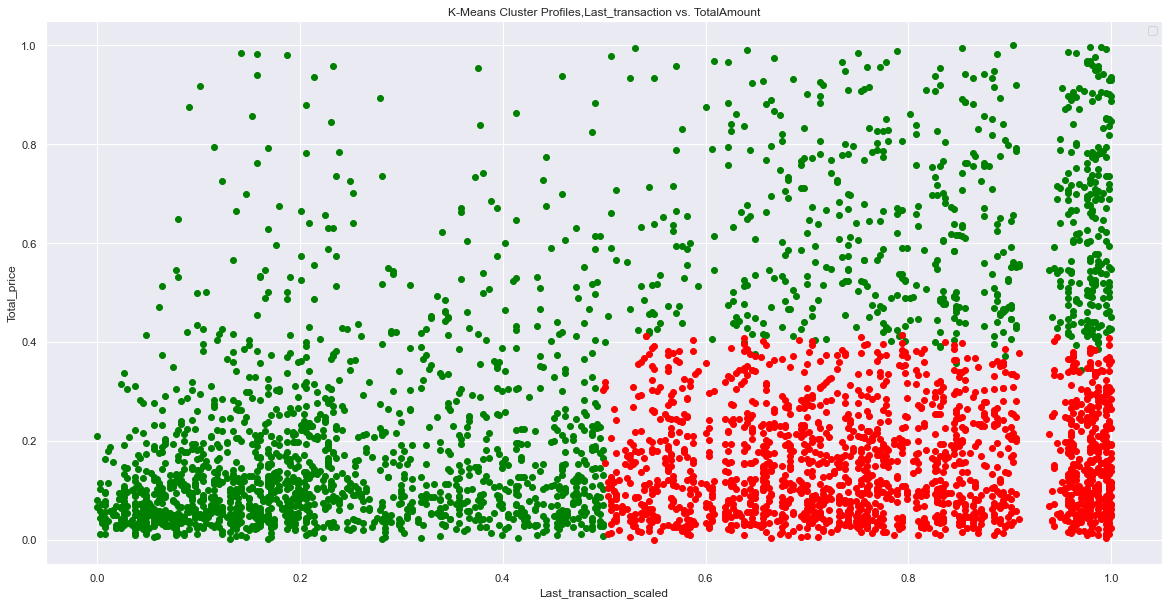

In [395]:
# Visualize the clusters with scaled data:
df1 = df_elbow[df_elbow.two_clusters==0]
df2 = df_elbow[df_elbow.two_clusters==1]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction_scaled,df1['Total_price_scaled'],color='green')
plt.scatter(df2.Last_transaction_scaled,df2['Total_price_scaled'],color='red')
plt.legend()
plt.xlabel('Last_transaction_scaled')
plt.ylabel('Total_price')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.savefig("P8_02_graphics/'K-Means Cluster Profiles,Last_transaction vs. TotalAmount-2'.jpeg")
plt.show()

Jusqu'à présent, nous ne traçons que le graphique des clusters avec seulement deux variables Last_transaction (Rerency) et Total_price (Moneytary)

Les graphiques ci-dessous permettront de visualiser les profils des clients en fonction de l'ensemble des données RFM (last_transaction, Total_price et InvoiceNo) de chaque modèle de clustering. 

**K-means Cluster: 3Clusters**

In [396]:
from mpl_toolkits.mplot3d import Axes3D

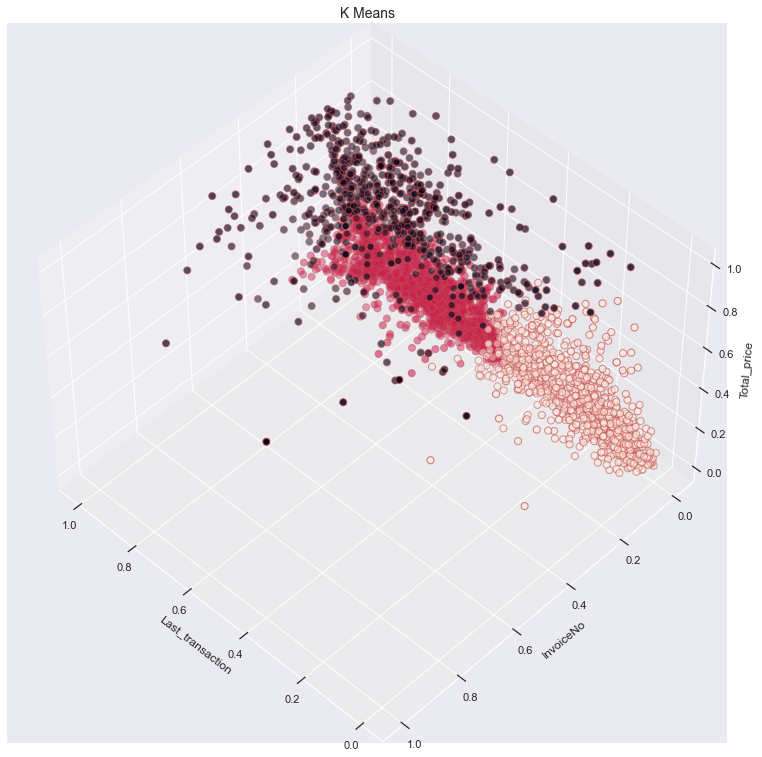

In [397]:
#KMeans Clusters with 3 Clusters
km = KMeans(n_clusters=3)
km.fit(df_elbow)
km.predict(df_elbow)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df_elbow['Last_transaction_scaled'], 
           df_elbow['InvoiceNo_scaled'], 
           df_elbow['Total_price_scaled'],
          c=labels.astype(np.float), 
           edgecolor="r", s=50)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("Total_price")
plt.title("K Means", fontsize=14)
plt.savefig("P8_02_graphics/'K-Means 3D'.jpeg")
plt.show()

 Hierarchical Agglomerative Clustering: 2 Clusters

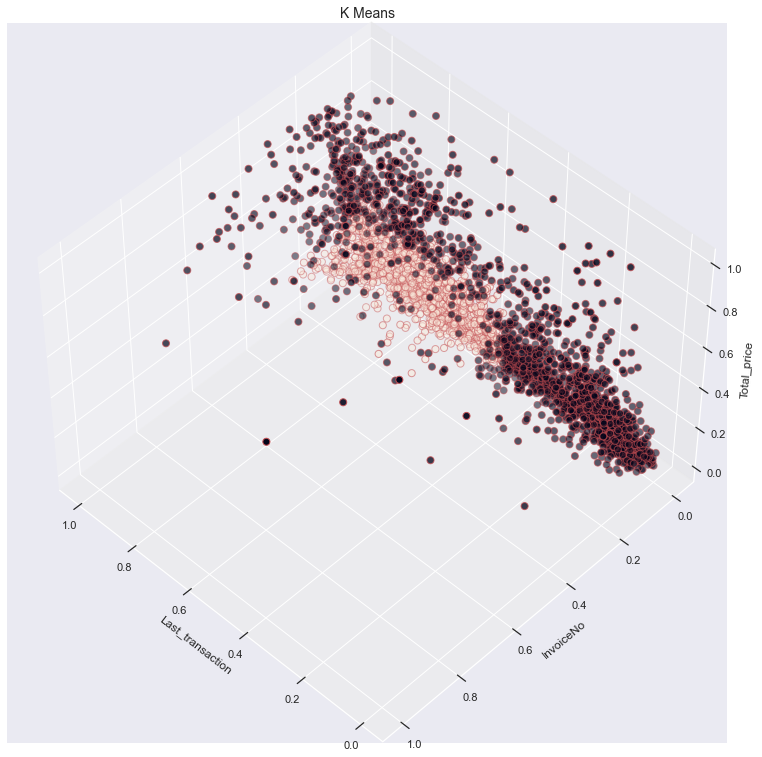

In [398]:
#KMeans Clusters with 2 Clusters
km = KMeans(n_clusters=2)
km.fit(df_elbow)
km.predict(df_elbow)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df_elbow['Last_transaction_scaled'], 
           df_elbow['InvoiceNo_scaled'], 
           df_elbow['Total_price_scaled'],
          c=labels.astype(np.float), 
           edgecolor="r", s=50)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("Total_price")
plt.title("K Means", fontsize=14)
plt.savefig("P8_02_graphics/'K-Means 3D-2'.jpeg")
plt.show()

# CONCLUSION



K-means Clusters: Elbow Method
K-means Clusters: Silhouette Method
Hierarchical Agglomerative Clustering

Chaque modèle identifiait des segments de clientèle distincts que l'entreprise pouvait cibler en fonction de leurs besoins.

Sur la base du comportement d'achat des clients, l'entreprise peut avoir une approche et une stratégie différentes pour chaque groupe de clients.

En utilisant les trois clusters trouvés dans le modèle K-Means, il existe 3 groupes différents de clients avec des comportements de dépenses différents :

Groupe 1 : le client a dépensé jusqu'à  £ 2 500  par achat et sa dernière commande remonte à moins de 3 mois

Groupe 2 : le client a dépensé jusqu'à £ 1 500  par achat et sa dernière commande date de 3 à 13 mois

Groupe 3 : le client a dépensé de £1 500 à £ 3500  par achat et sa dernière commande varie de 1,5 mois à 13 mois

À mon avis, le client du premier segment est le segment le plus important de l'entreprise car il dépense un montant relativement élevé et revient assez souvent pour le prochain achat.

À l'avenir, pour mieux comprendre les préférences des clients, des données supplémentaires sur pourraient être utilisées pour personnaliser davantage les offres de produits pour chaque segment. 